# データ概要

In [291]:
import pandas as pd

# ファイルパス
train_file_path = 'dataset_ica_ml_train.csv'
test_file_path = 'dataset_ica_ml_test.csv'

# データの読み込み
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# データ概要
print("Train Data Information:")
train_data.info()

print("\nTest Data Information:")
test_data.info()

# データの先頭5行を表示
print("\nTrain Data Head:")
print(train_data.head())

print("\nTest Data Head:")
print(test_data.head())

# 各カラムの欠損値を確認
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

# 統計情報の表示
print("\nStatistical Summary of Train Data:")
print(train_data.describe())

print("\nStatistical Summary of Test Data:")
print(test_data.describe())

Train Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  expenditure_1    10000 non-null  int64  
 12  expenditure_2    10000 non-null  int64  
 13  expenditure_3    10000 non-null  int64  
 14  expenditure_4    10000 non-null  int64  
 15  expenditure_5    10000 non-null  int64  
 16  expenditure_6    10000 non-null  in

# ユニーク値の偏り

In [245]:
# Trainデータのユニーク値
unique_values = train_data.nunique()
print(unique_values)

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
expenditure_1         2
expenditure_2         2
expenditure_3         2
expenditure_4         2
expenditure_5         2
expenditure_6         2
expenditure_7         2
expenditure_8         2
expenditure_9         2
expenditure_10        2
event_1               2
event_2               2
event_3               2
event_4               2
event_5               2
event_6               2
event_7               2
event_8               2
event_9               2
event_10              2
year                  1
dtype: int64


In [246]:
# testデータのユニーク値
unique_values = test_data.nunique()
print(unique_values)

CreditScore         474
Geography             3
Gender                2
Age                  71
Tenure               12
Balance            6579
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
expenditure_1       200
expenditure_2       200
expenditure_3       400
expenditure_4       400
expenditure_5       398
expenditure_6       395
expenditure_7       200
expenditure_8       378
expenditure_9       244
expenditure_10      109
event_1               2
event_2               2
event_3               2
event_4               2
event_5               2
event_6               2
event_7               2
event_8               2
event_9               2
event_10              2
year                  1
dtype: int64


In [247]:
train_data["expenditure_1"]

,expenditure_1
0,1000
1,1000
2,0
3,1000
4,1000
...,...
9995,1000
9996,0
9997,1000
9998,0


In [248]:
test_data["expenditure_1"]

,expenditure_1
0,956
1,1013
2,-42
3,991
4,968
...,...
9995,974
9996,1
9997,1034
9998,-28


trainデータの商品の利用料の数値0の意味は？？

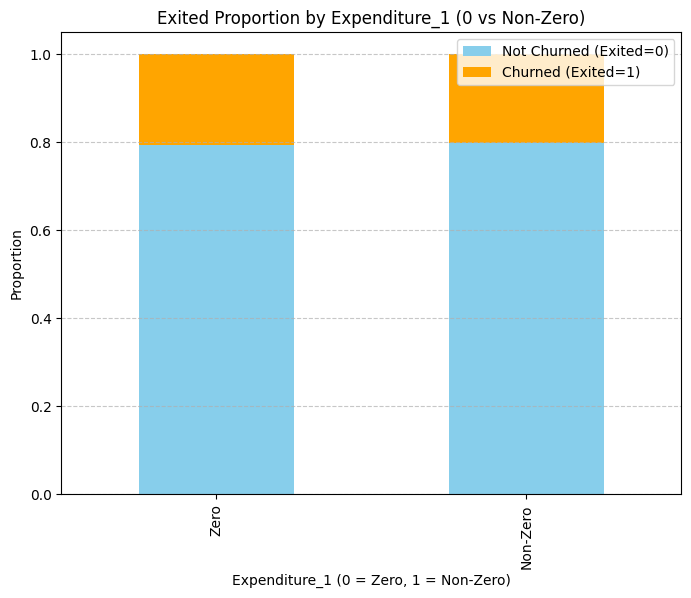

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# expenditure_1 が 0 と 0以外で `Exited` の割合を比較
train_data['expenditure_1_zero'] = (train_data['expenditure_1'] == 0).astype(int)
exited_by_expenditure = train_data.groupby('expenditure_1_zero')['Exited'].value_counts(normalize=True).unstack()

# 棒グラフで可視化
exited_by_expenditure.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(8, 6))
plt.title("Exited Proportion by Expenditure_1 (0 vs Non-Zero)")
plt.xlabel("Expenditure_1 (0 = Zero, 1 = Non-Zero)")
plt.ylabel("Proportion")
plt.xticks([0, 1], ['Zero', 'Non-Zero'])
plt.legend(["Not Churned (Exited=0)", "Churned (Exited=1)"], loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [250]:
# テストデータのBalance列で値が-100の個数をカウント
negative_balance_count = test_data[test_data['Balance'] == -100].shape[0]

# 結果を表示
print(negative_balance_count)

23


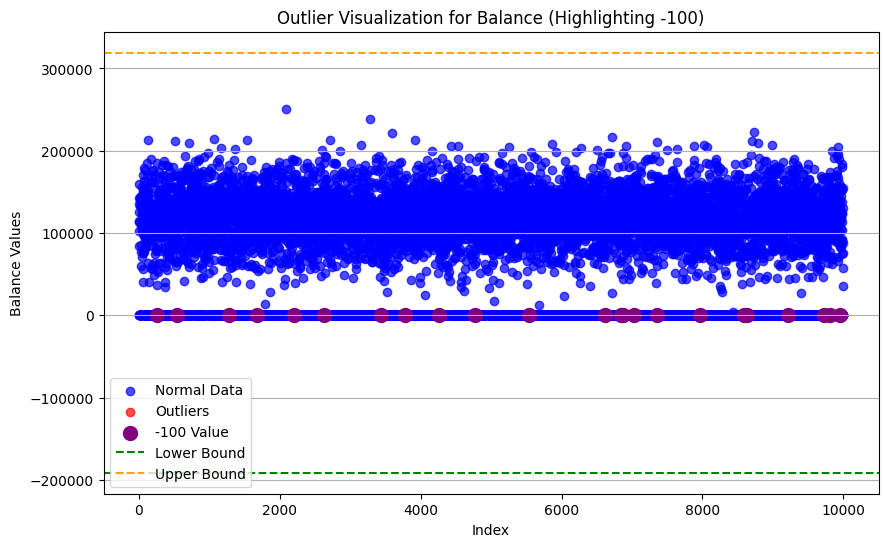

In [251]:
import matplotlib.pyplot as plt

# 外れ値の検出
Q1 = test_data['Balance'].quantile(0.25)
Q3 = test_data['Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 正常データと外れ値を分ける
non_outliers = test_data[(test_data['Balance'] >= lower_bound) & (test_data['Balance'] <= upper_bound)]
outliers = test_data[(test_data['Balance'] < lower_bound) | (test_data['Balance'] > upper_bound)]

# 異常値 -100 を特定
negative_outlier = test_data[test_data['Balance'] == -100]

# プロット
plt.figure(figsize=(10, 6))

# 正常データ（青）
plt.scatter(non_outliers.index, non_outliers['Balance'], label="Normal Data", color='blue', alpha=0.7)

# 外れ値（赤）
plt.scatter(outliers.index, outliers['Balance'], label="Outliers", color='red', alpha=0.7)

# 特に注目する -100 の値（紫）
plt.scatter(negative_outlier.index, negative_outlier['Balance'], label="-100 Value", color='purple', s=100)

# 境界線
plt.axhline(y=lower_bound, color='green', linestyle='--', label="Lower Bound")
plt.axhline(y=upper_bound, color='orange', linestyle='--', label="Upper Bound")

# グラフの設定
plt.title("Outlier Visualization for Balance (Highlighting -100)")
plt.xlabel("Index")
plt.ylabel("Balance Values")
plt.legend()
plt.grid(axis='y')
plt.show()




In [252]:
# trainデータのBalance列で値が-100の個数を念の為カウント
negative_balance_count = train_data[train_data['Balance'] == -100].shape[0]

# 結果を表示
print(negative_balance_count)

0


# 解約の割合

<ipython-input-253-a766d5a6ce11>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exited_counts.index, y=exited_counts.values, palette='viridis')


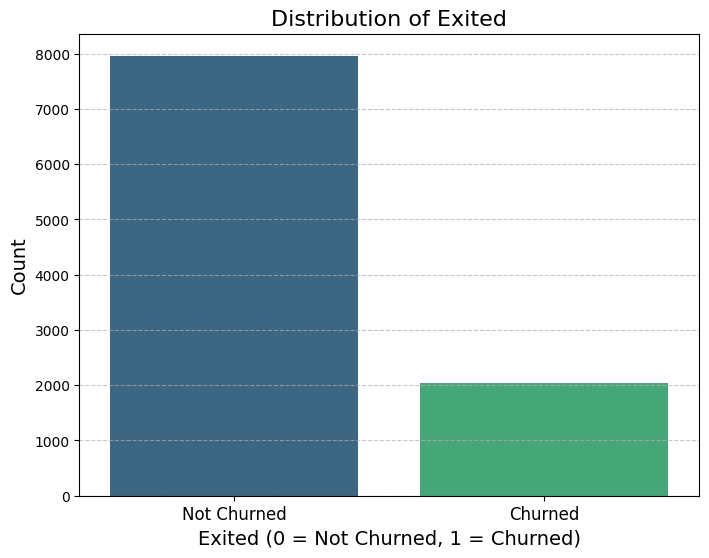

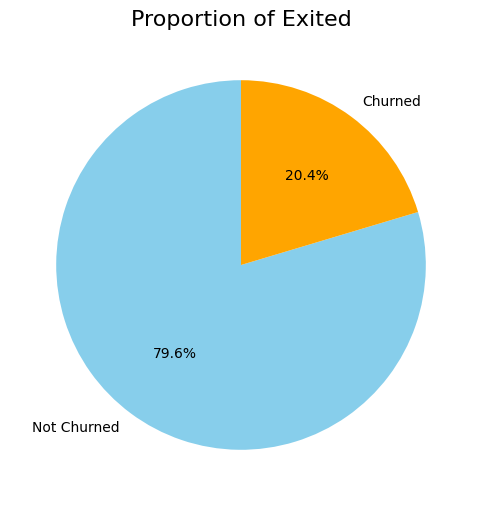

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# `Exited` の分布を確認
exited_counts = train_data['Exited'].value_counts()

# 棒グラフで可視化
plt.figure(figsize=(8, 6))
sns.barplot(x=exited_counts.index, y=exited_counts.values, palette='viridis')
plt.title("Distribution of Exited", fontsize=16)
plt.xlabel("Exited (0 = Not Churned, 1 = Churned)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ['Not Churned', 'Churned'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 円グラフで可視化
plt.figure(figsize=(8, 6))
plt.pie(exited_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Proportion of Exited", fontsize=16)
plt.show()

# 数値変数の分布 (ヒストグラム & 箱ひげ図)

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>,
        <Axes: title={'center': 'expenditure_1'}>,
        <Axes: title={'center': 'expenditure_2'}>,
        <Axes: title={'center': 'expenditure_3'}>],
       [<Axes: title={'center': 'expenditure_4'}>,
        <Axes: title={'center': 'expenditure_5'}>,
        <Axes: title={'center': 'expenditure_6'}>,
        <Axes: title={'center': 'expenditure_7'}>,
        <Axes: title={'center': 'expenditure_8'}>,
        <Axes: title={'center': 'expenditure_9'}>],
       [<Axes: title={'center': 'expenditure_10'}>,
        <Axes: title={'center': 'event_1'}>,
        <Axes: 

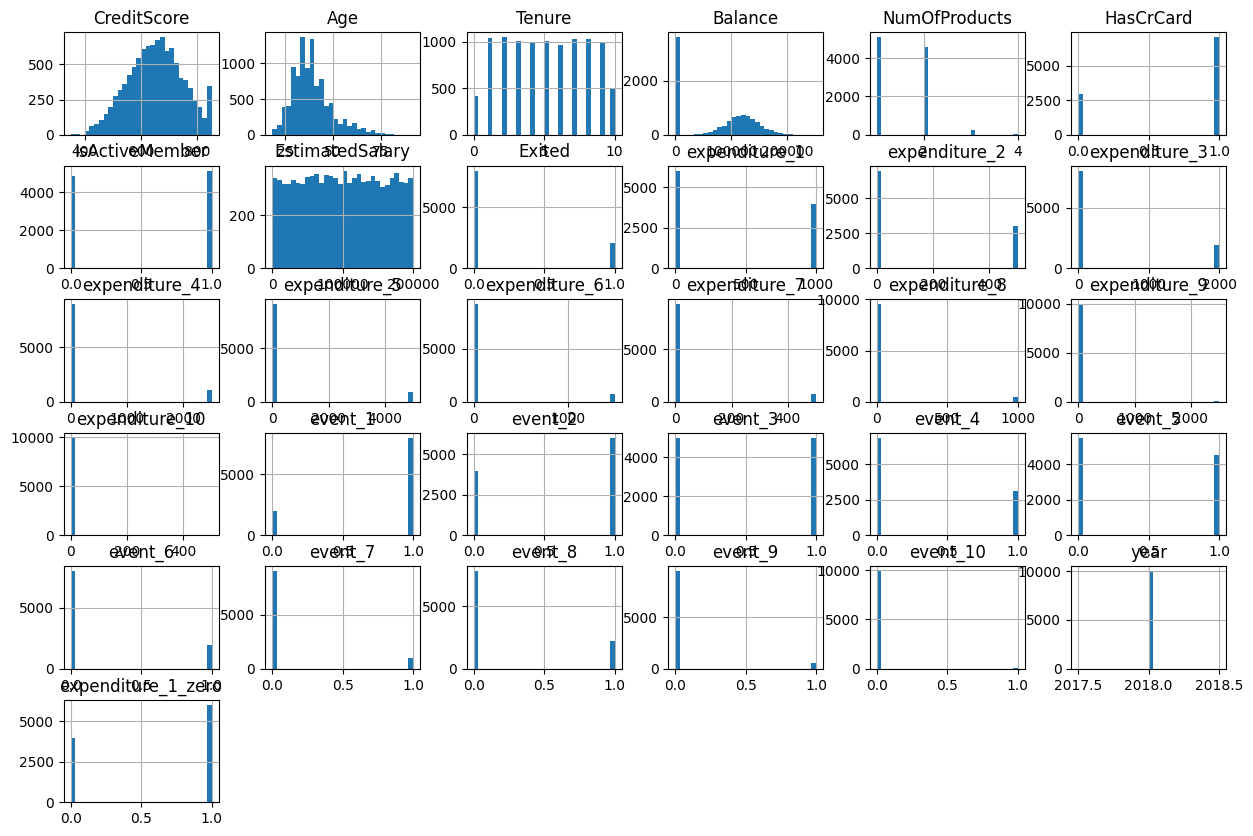

In [254]:
train_data.hist(bins=30, figsize=(15, 10))

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>,
        <Axes: title={'center': 'expenditure_1'}>],
       [<Axes: title={'center': 'expenditure_2'}>,
        <Axes: title={'center': 'expenditure_3'}>,
        <Axes: title={'center': 'expenditure_4'}>,
        <Axes: title={'center': 'expenditure_5'}>,
        <Axes: title={'center': 'expenditure_6'}>],
       [<Axes: title={'center': 'expenditure_7'}>,
        <Axes: title={'center': 'expenditure_8'}>,
        <Axes: title={'center': 'expenditure_9'}>,
        <Axes: title={'center': 'expenditure_10'}>,
        <Axes: title={'center': 'event_1'}>],
       [<Axes:

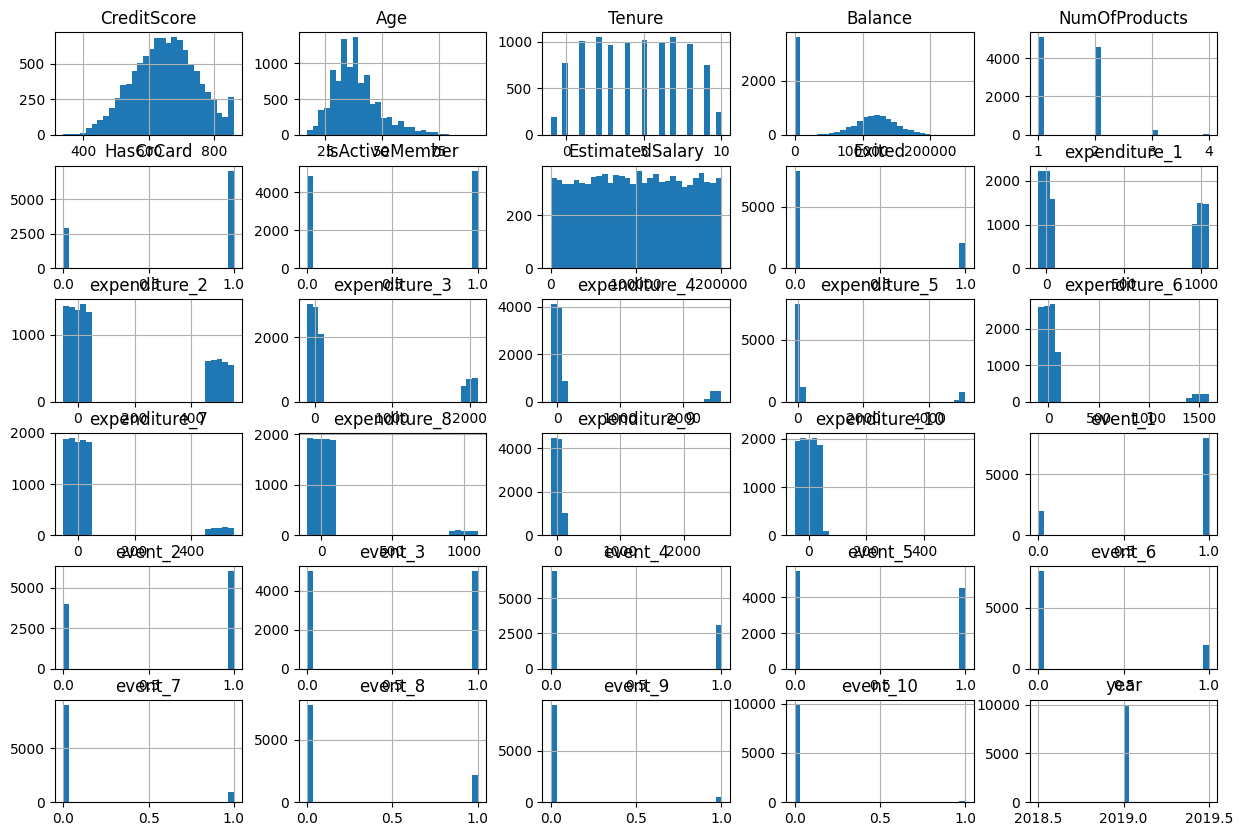

In [255]:
test_data.hist(bins=30, figsize=(15, 10))

# 解約フラグとの関係

# 各カテゴリーの割合と個数

In [292]:
# 各カテゴリーの割合と個数を表示
import seaborn as sns
# 各列のユニークな値の個数を計算
unique_counts = train_data.nunique()

# カテゴリ変数と連続変数を区別するためのしきい値を設定
threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()


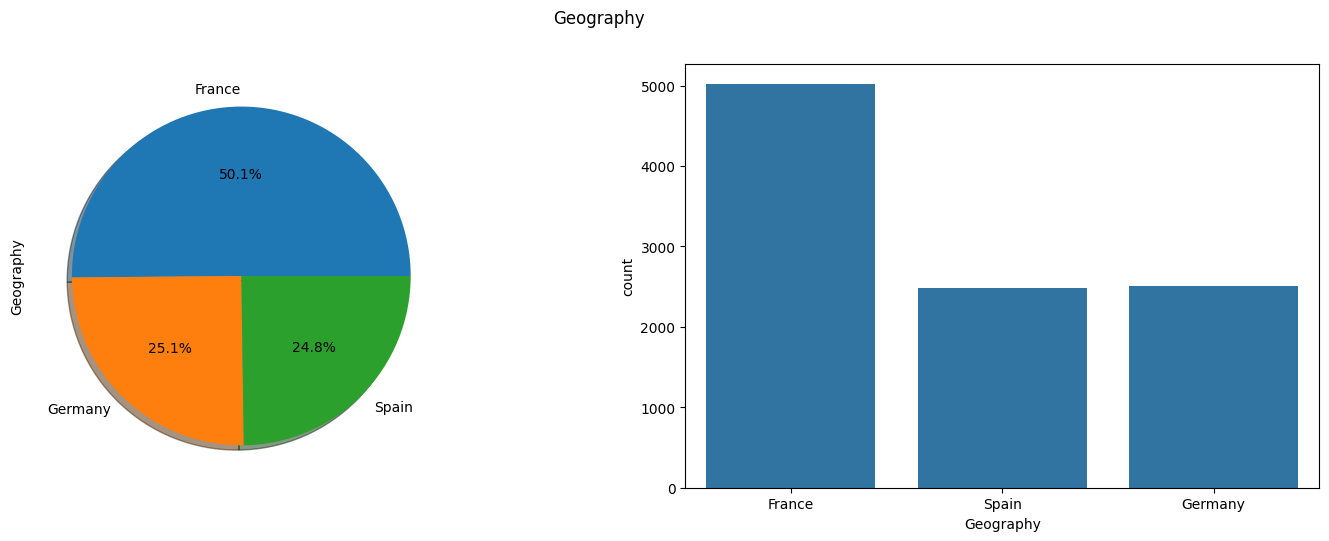

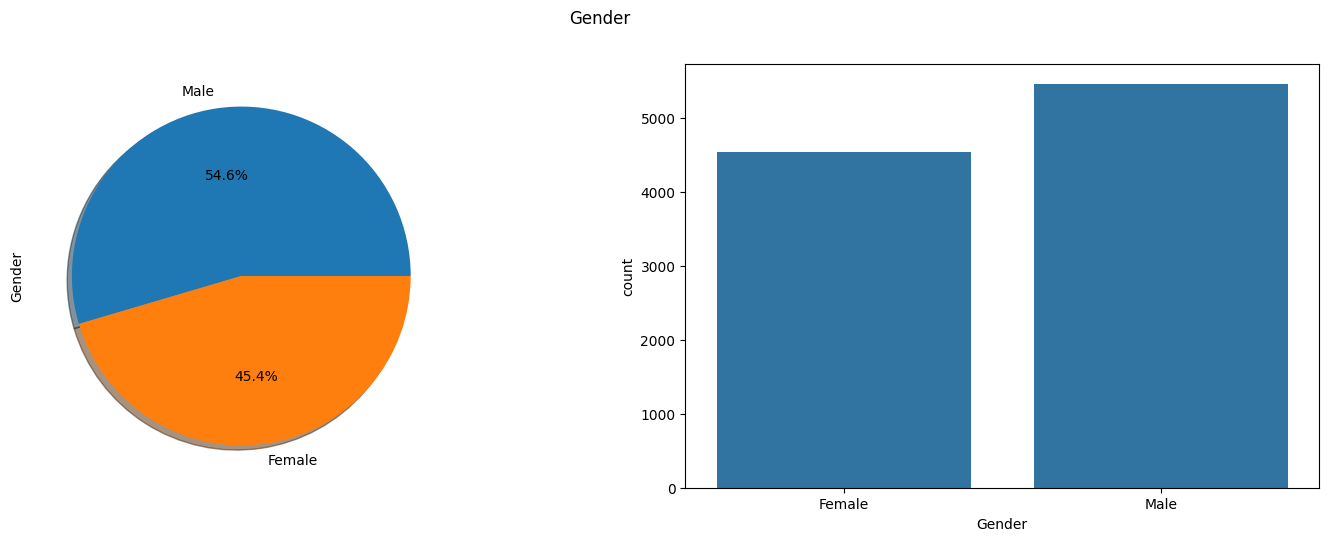

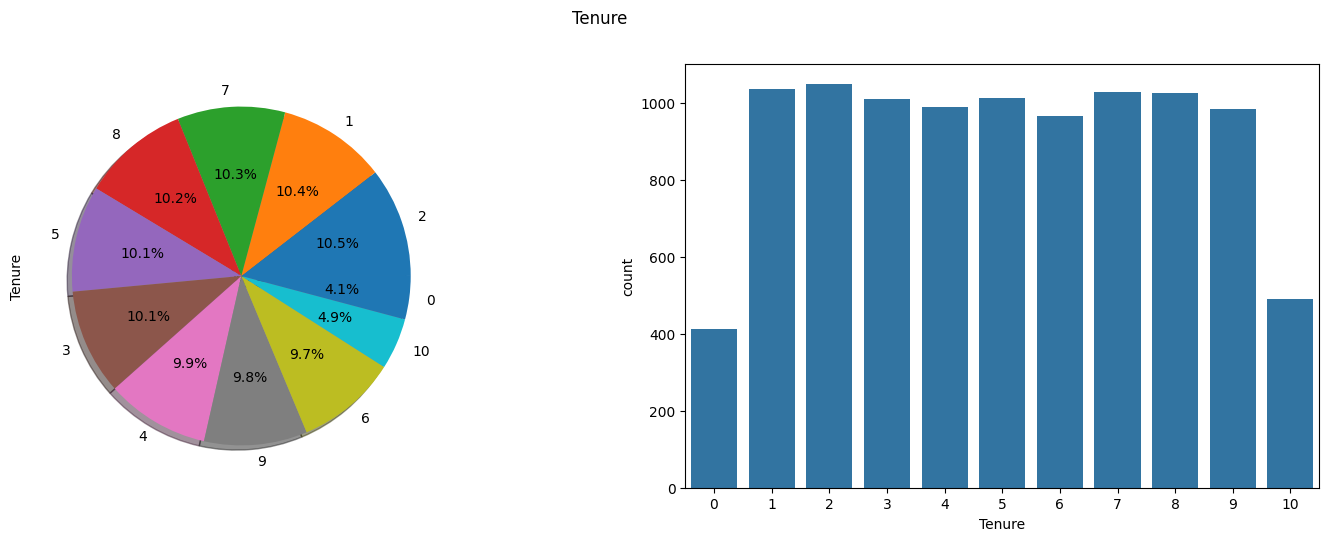

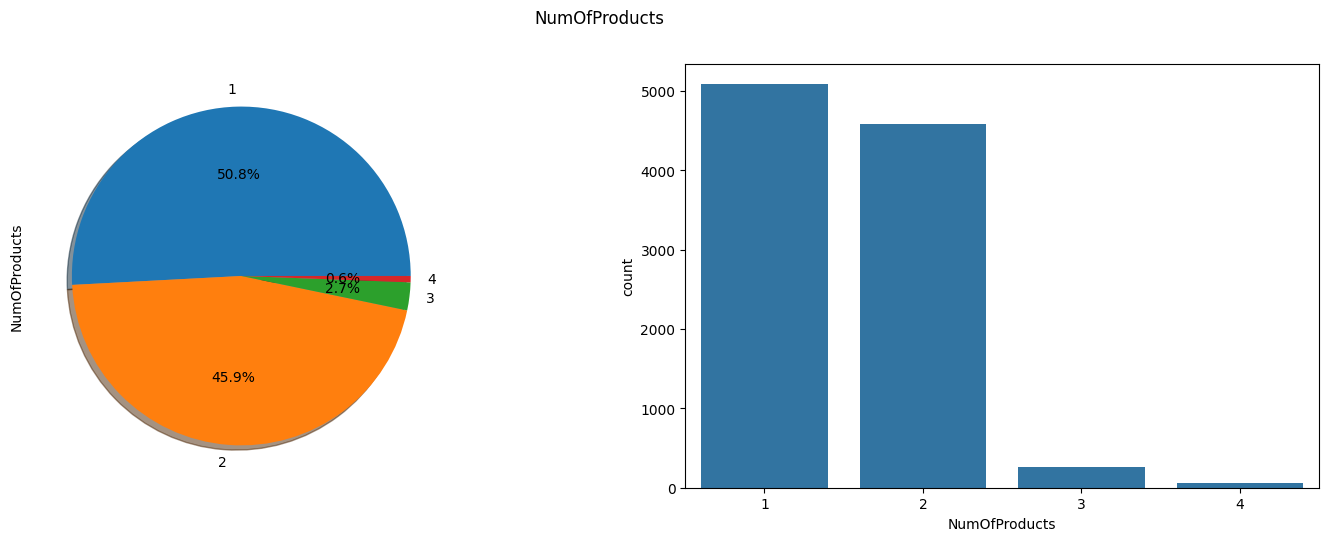

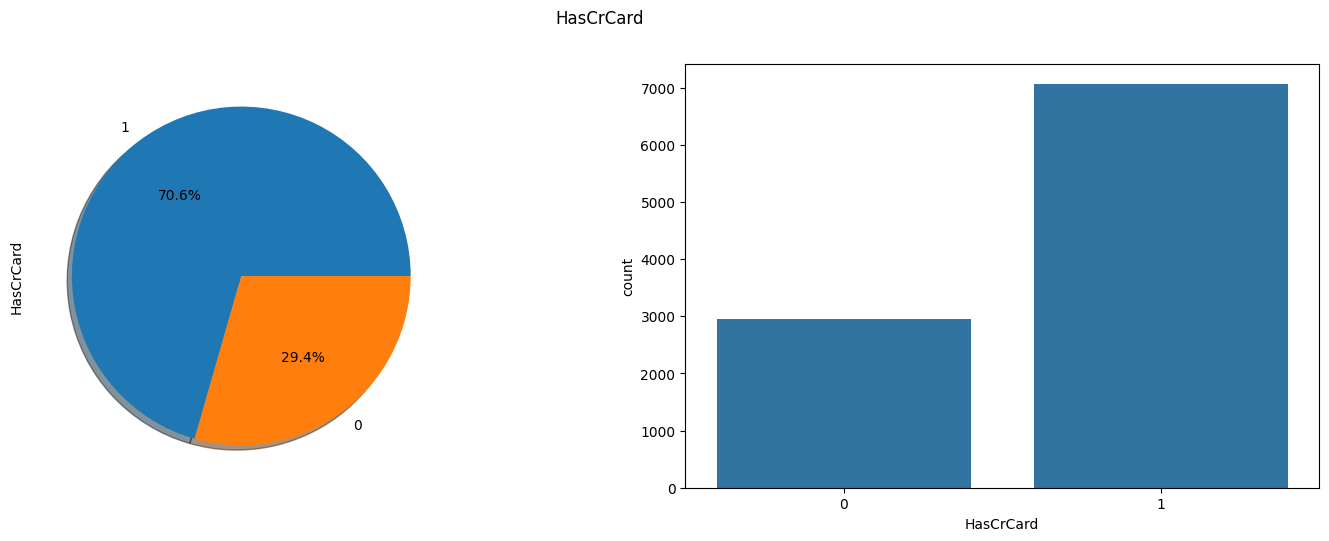

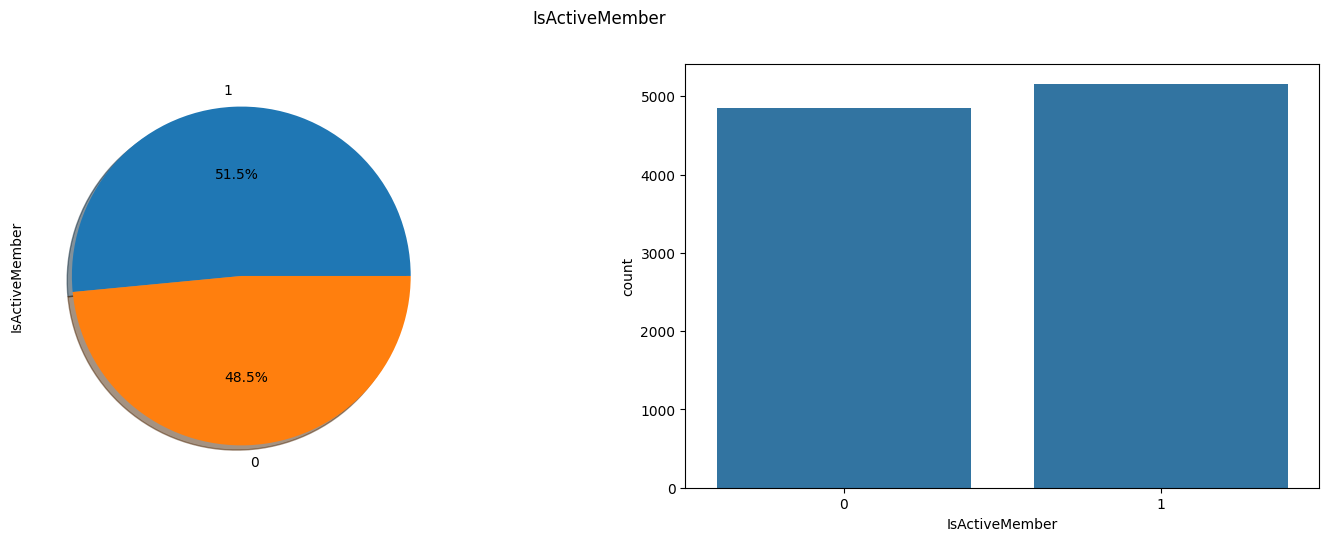

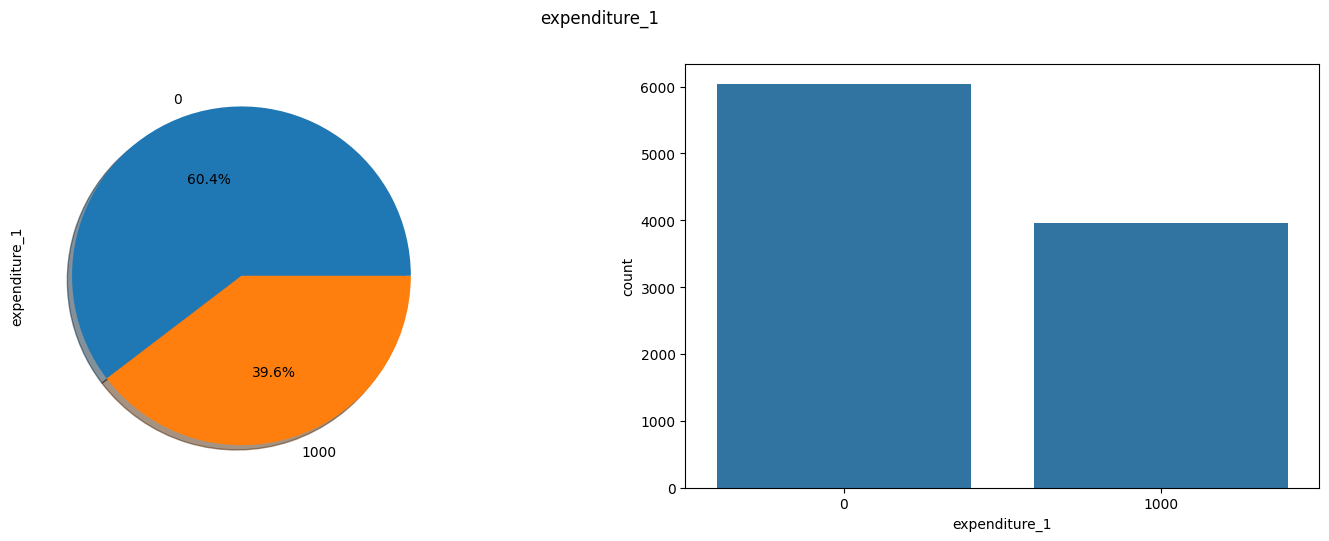

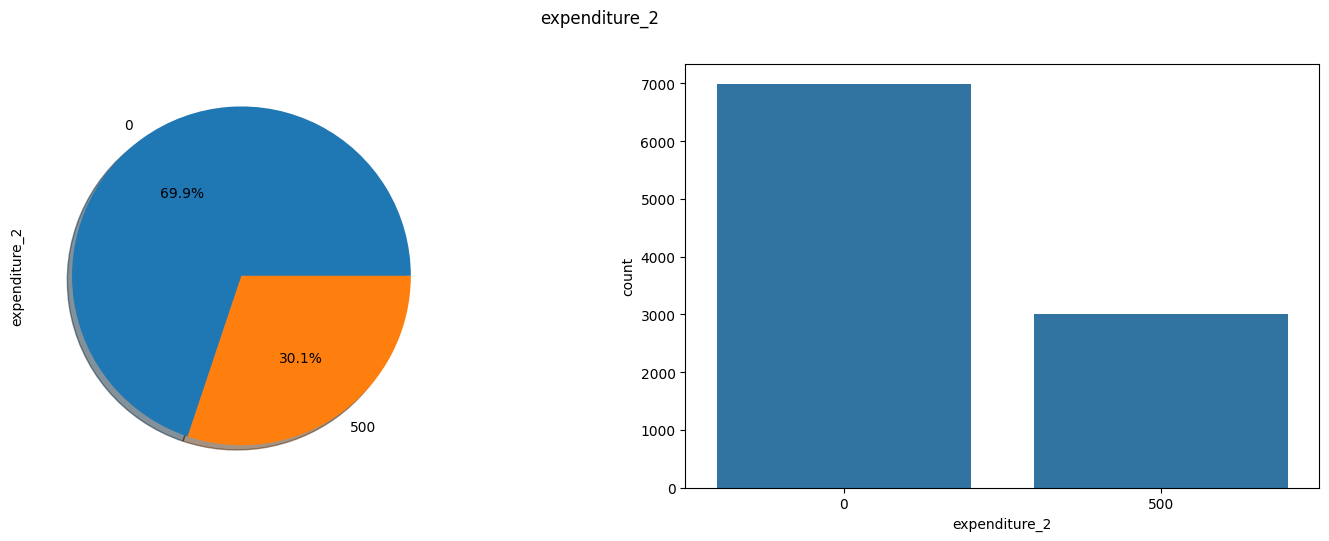

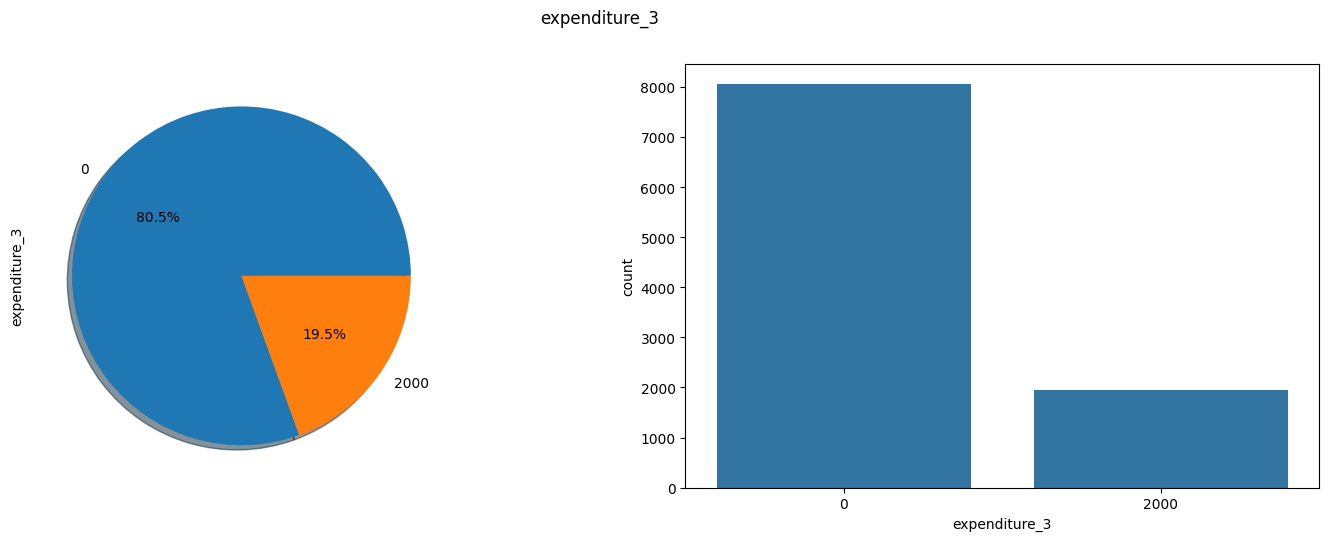

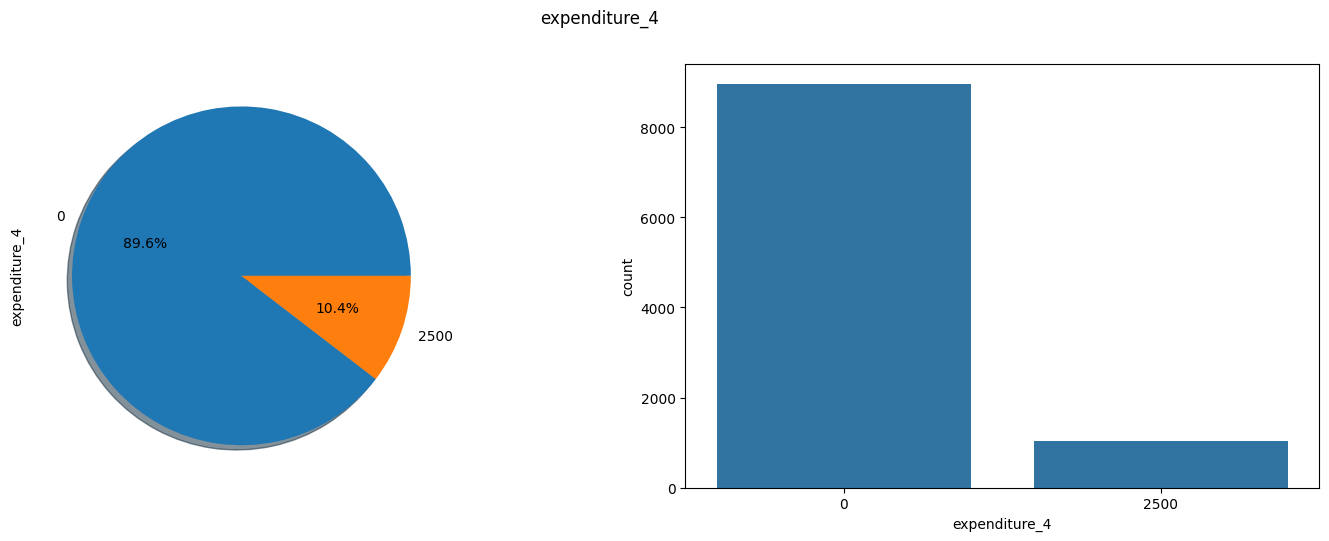

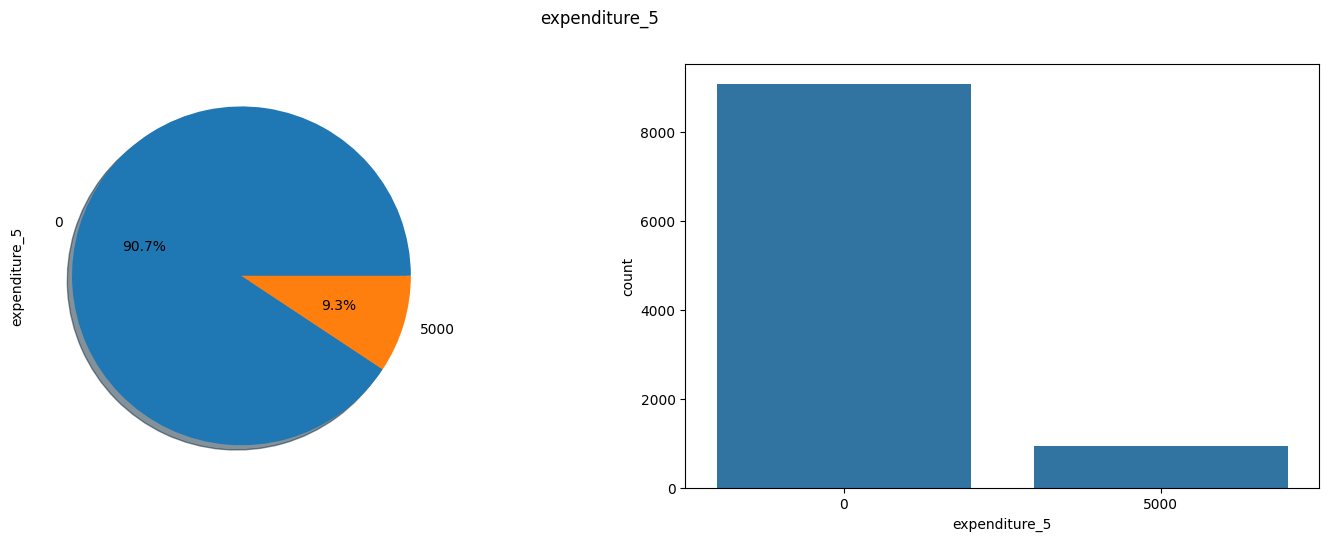

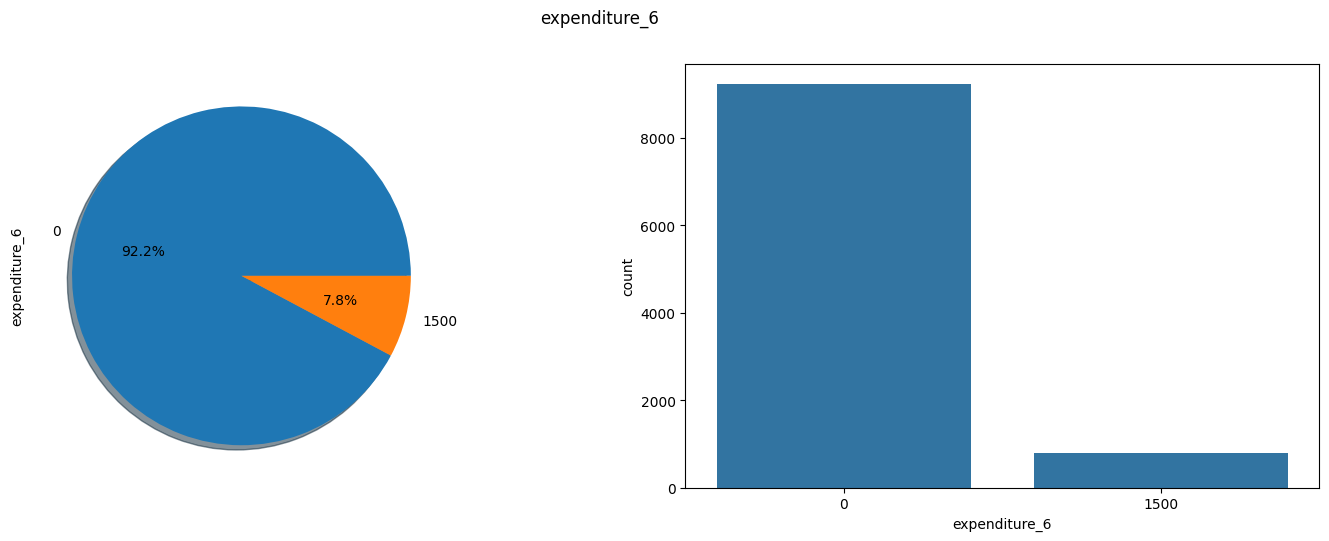

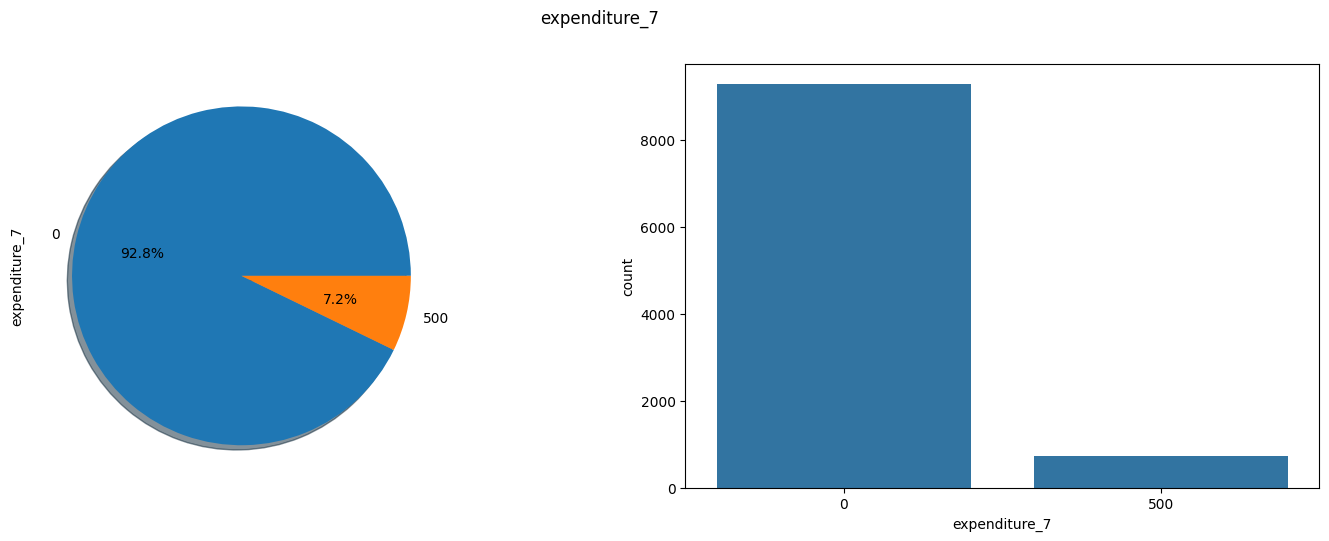

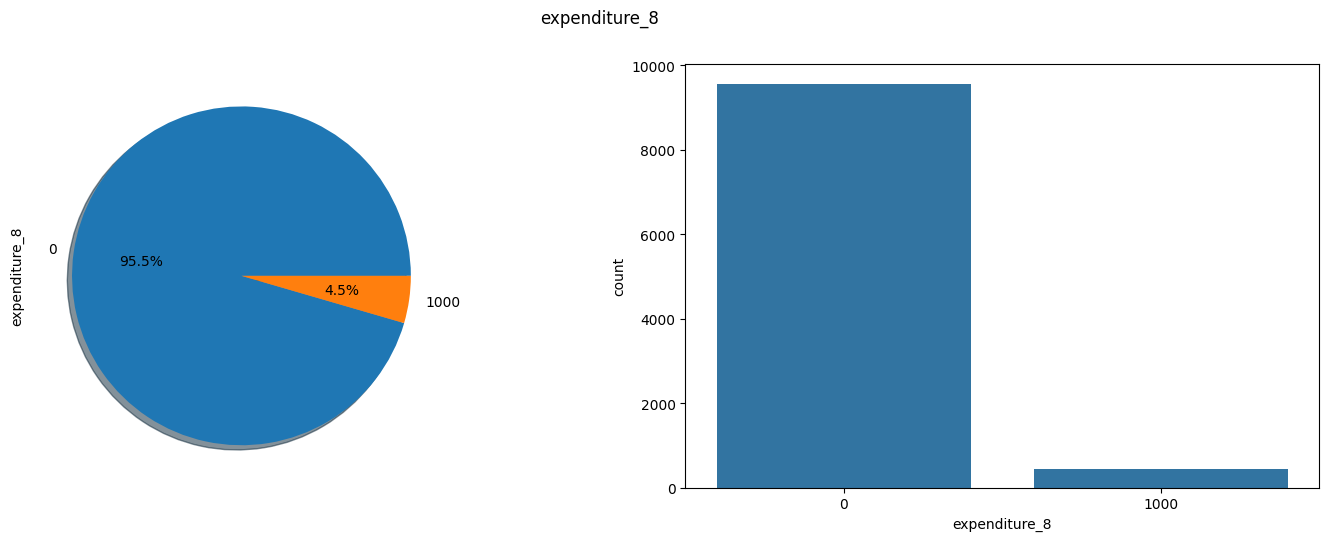

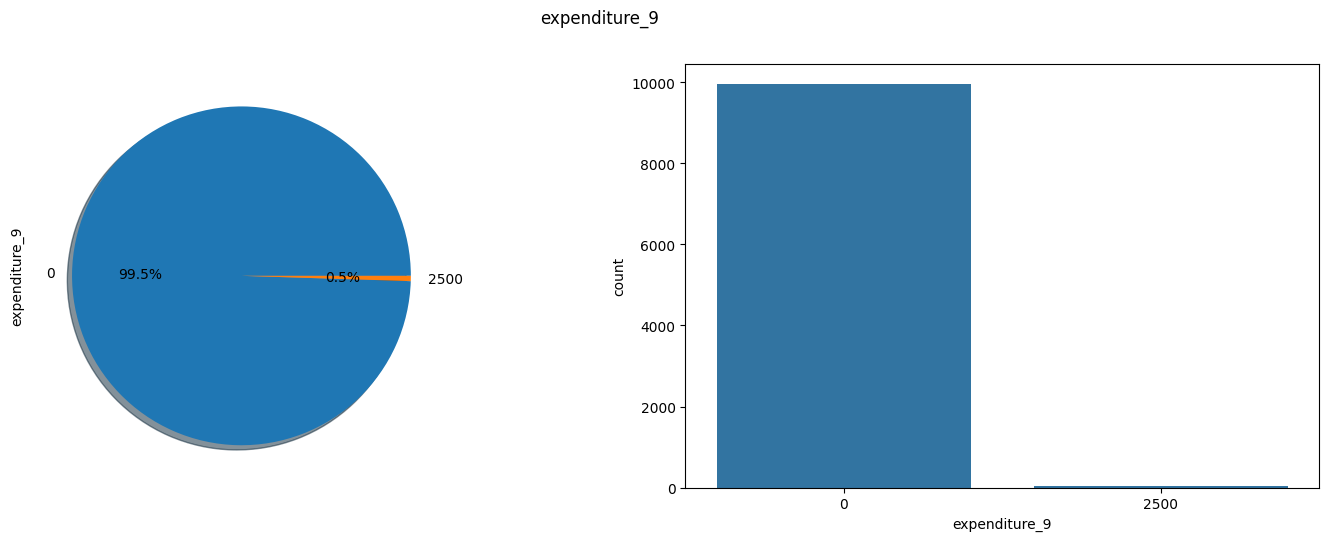

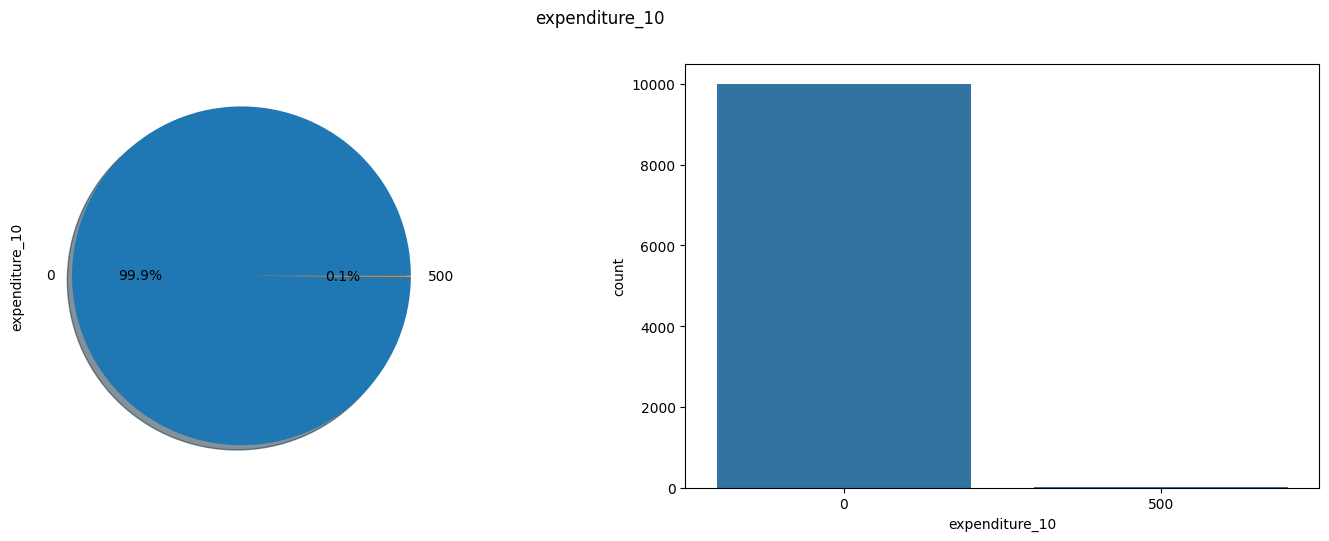

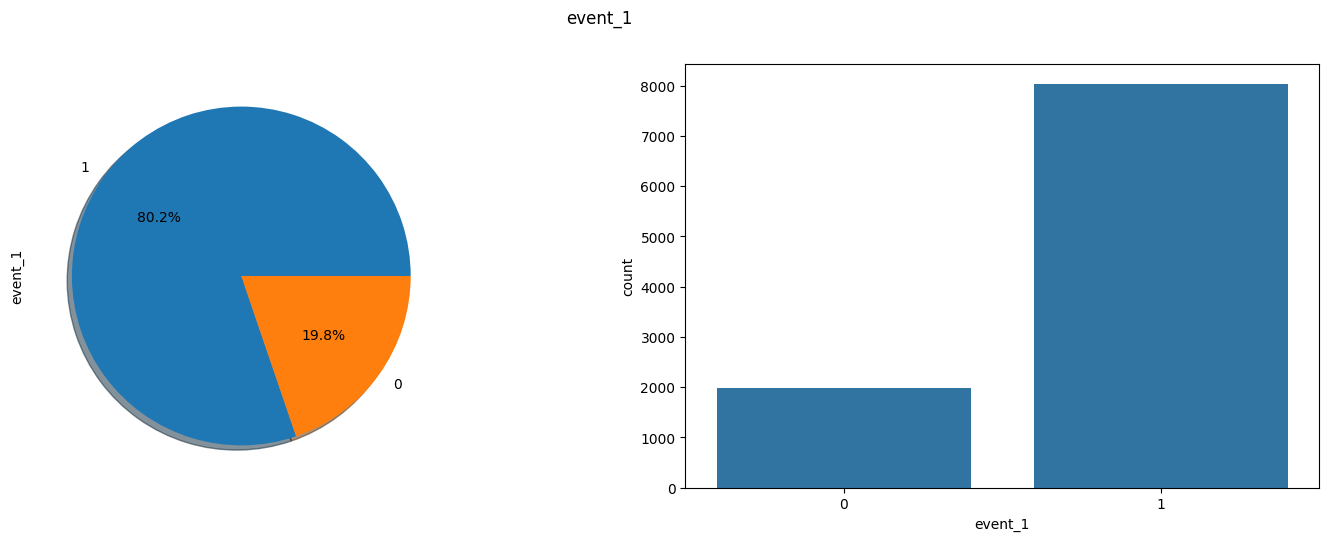

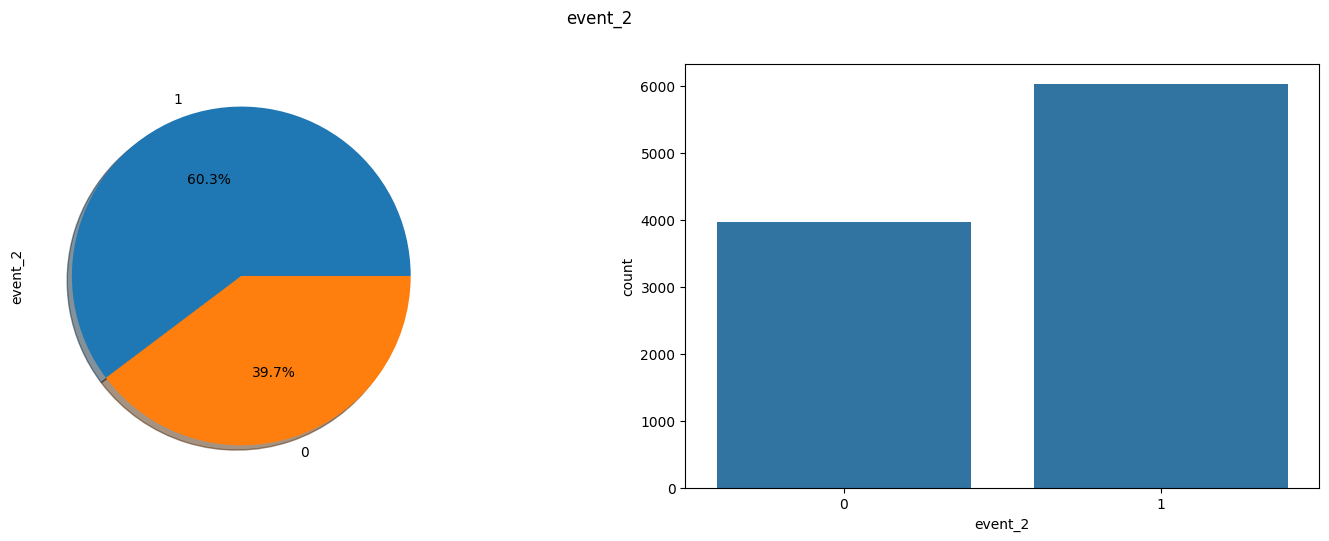

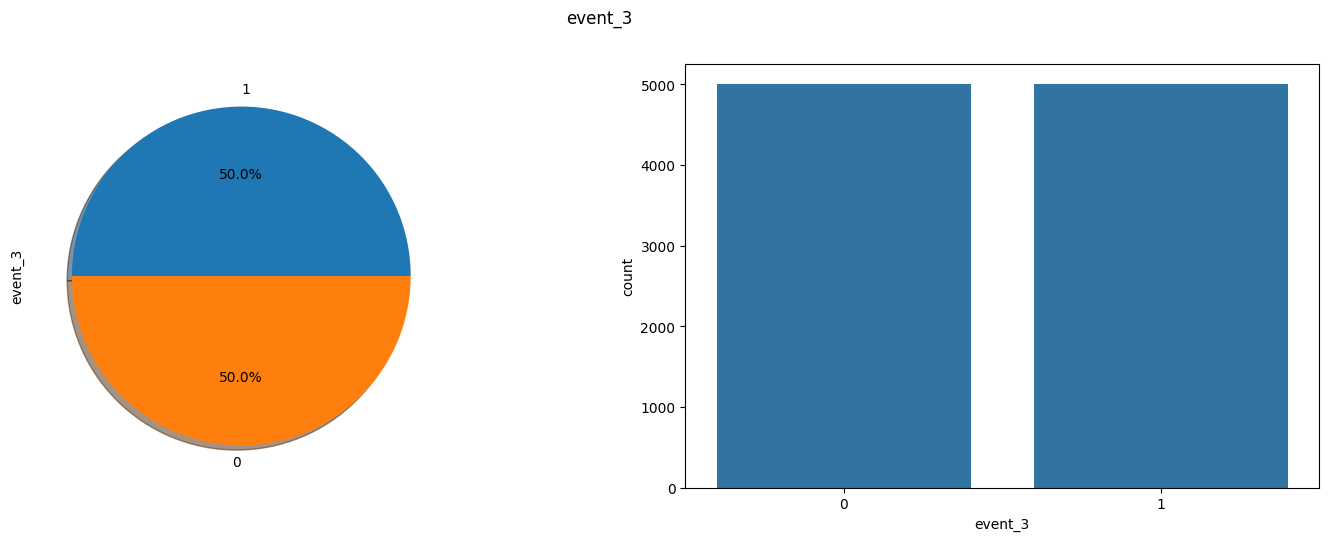

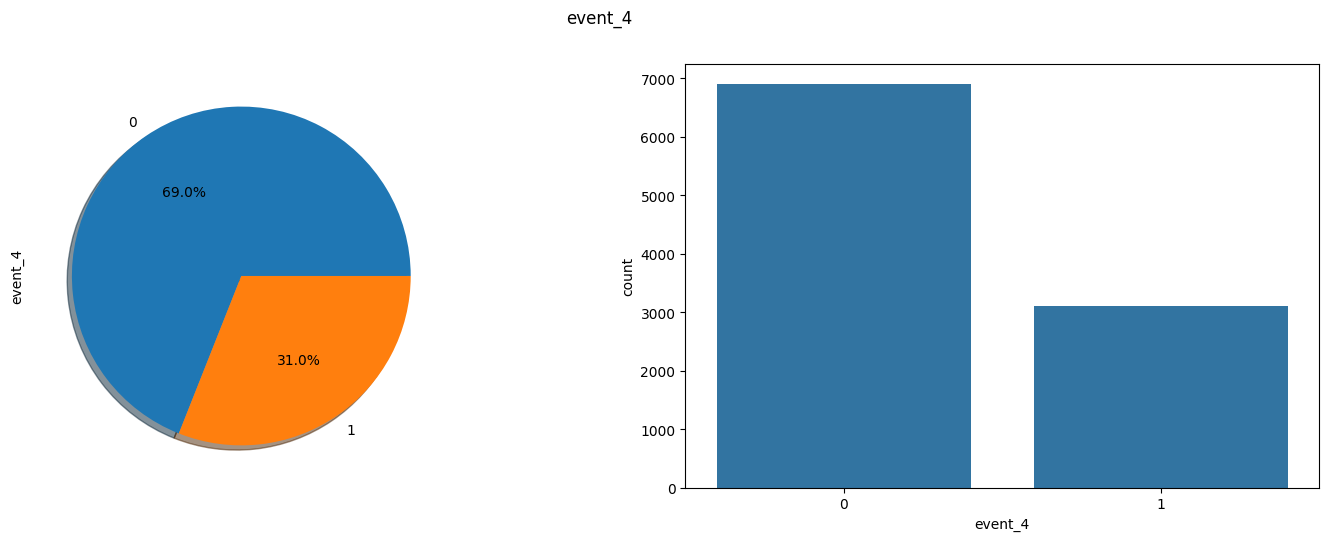

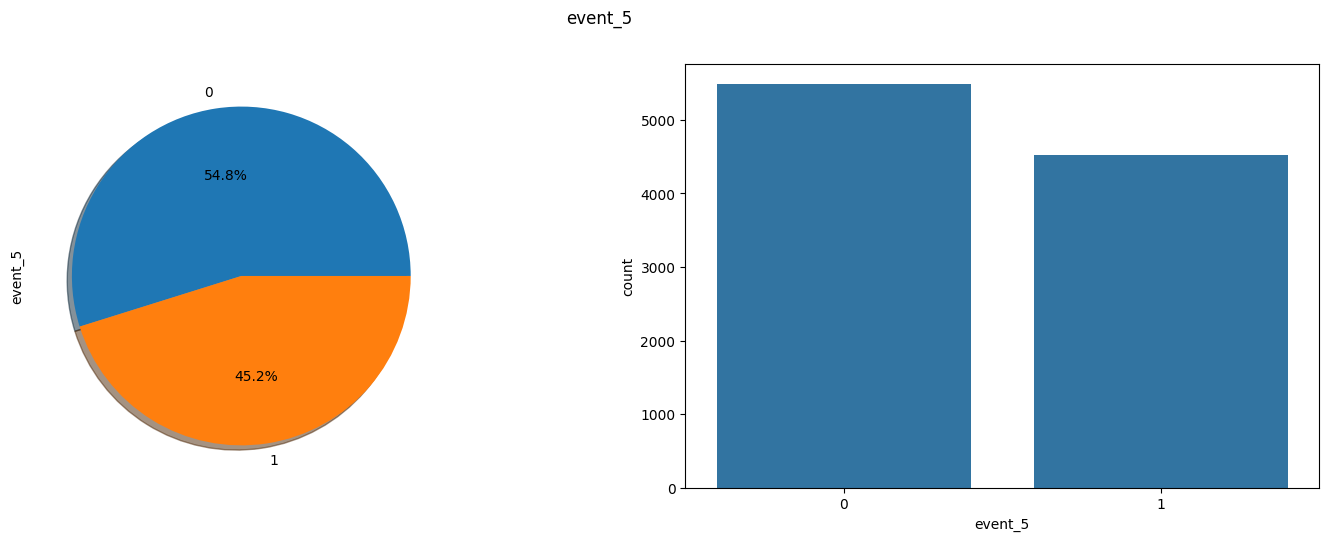

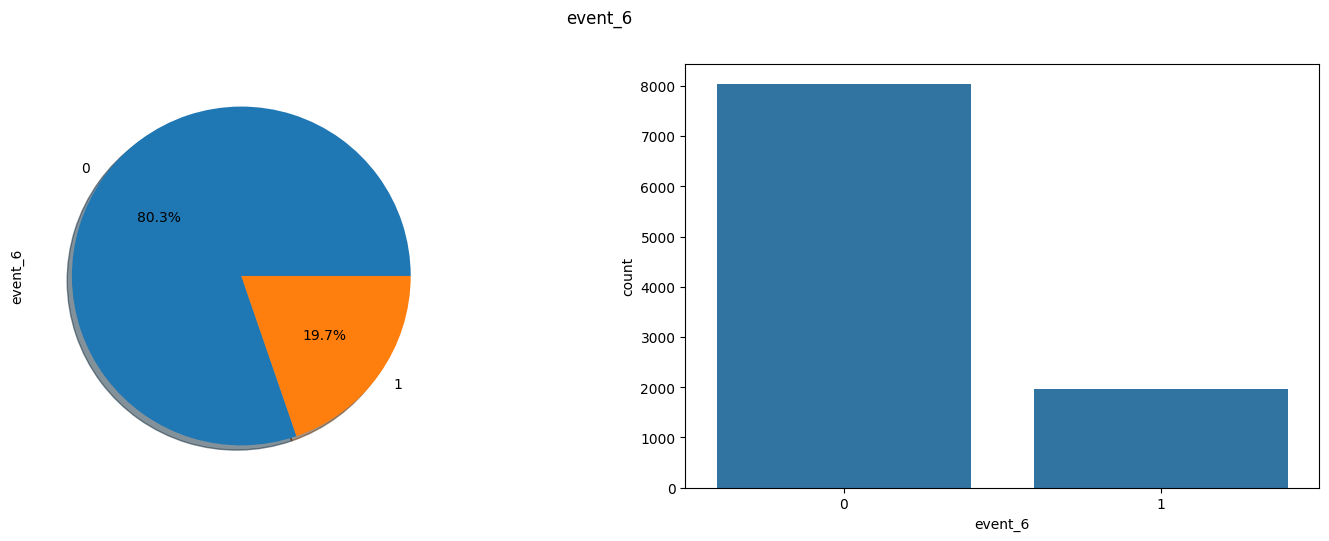

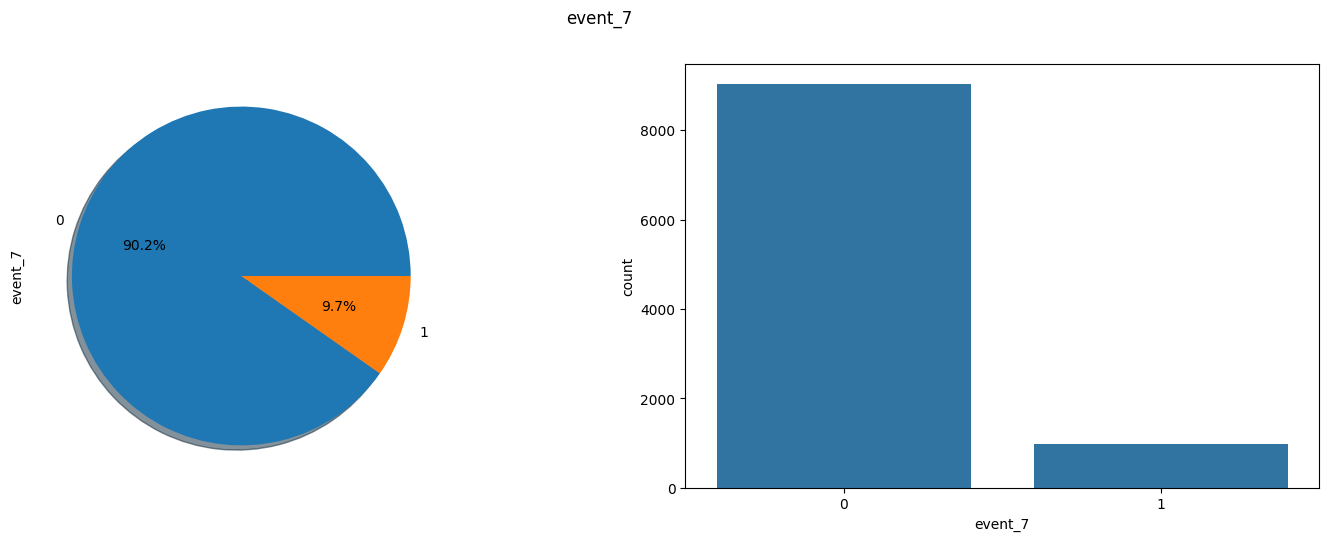

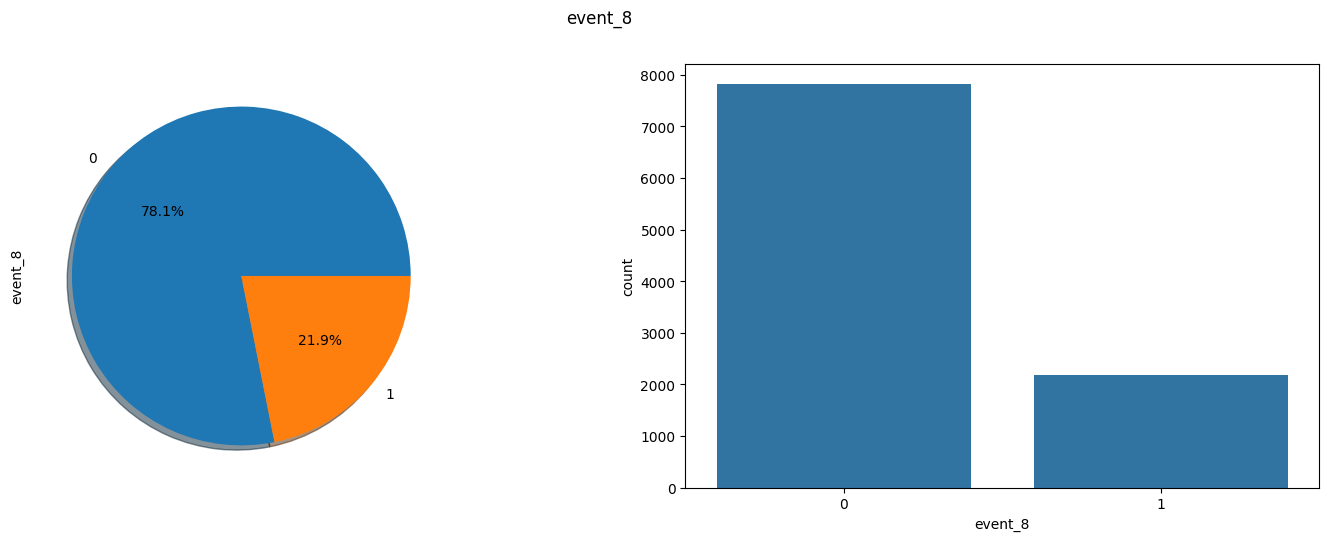

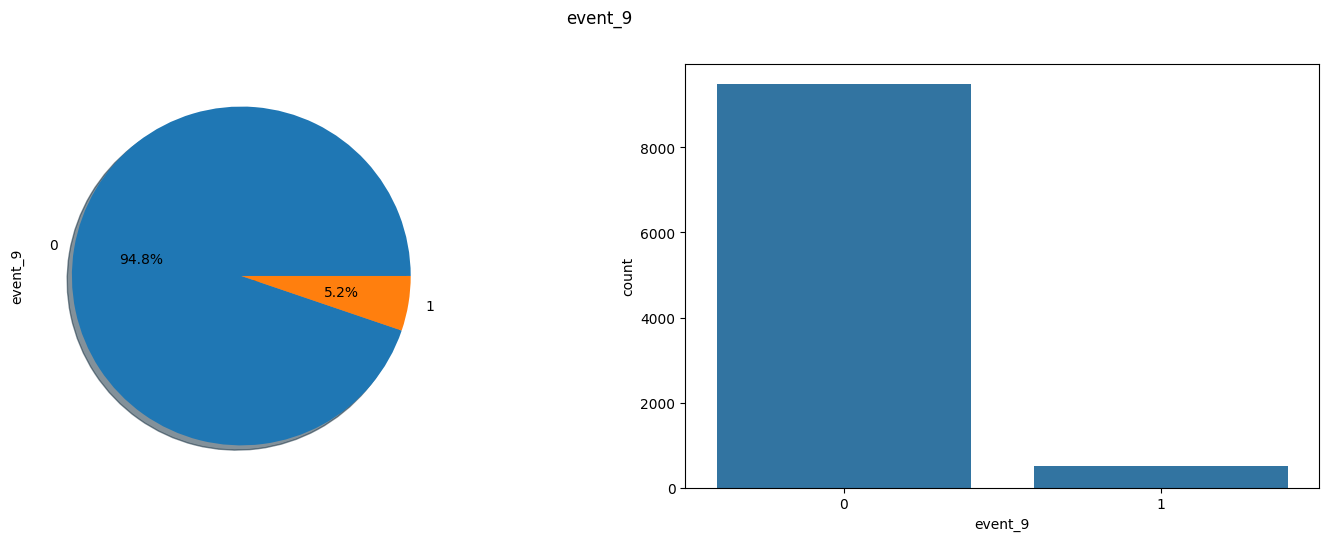

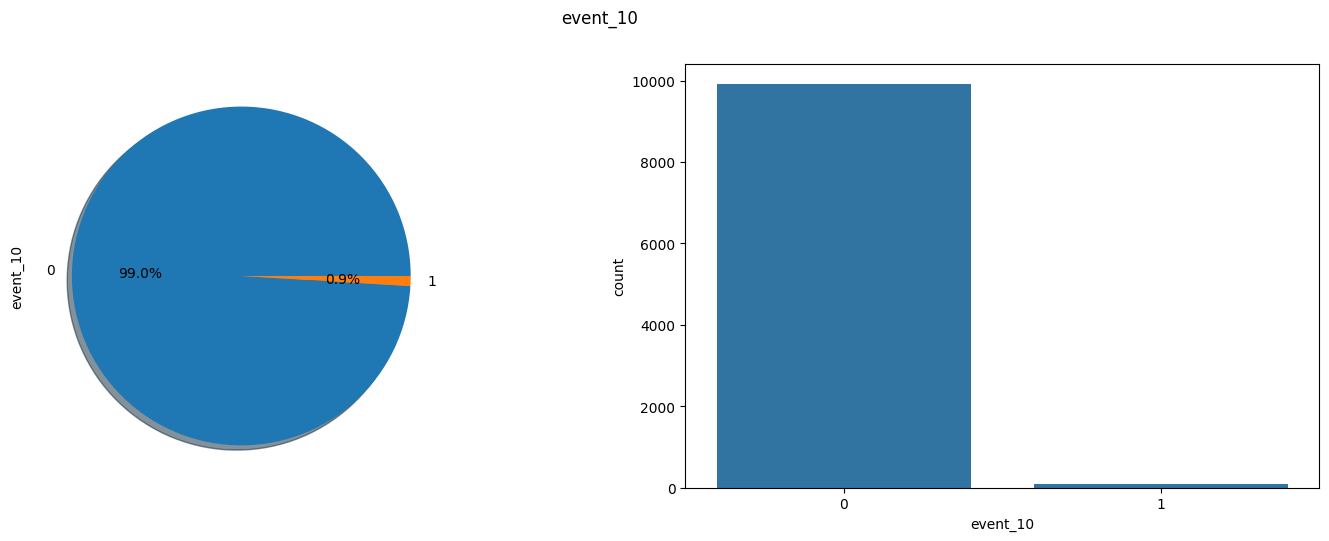

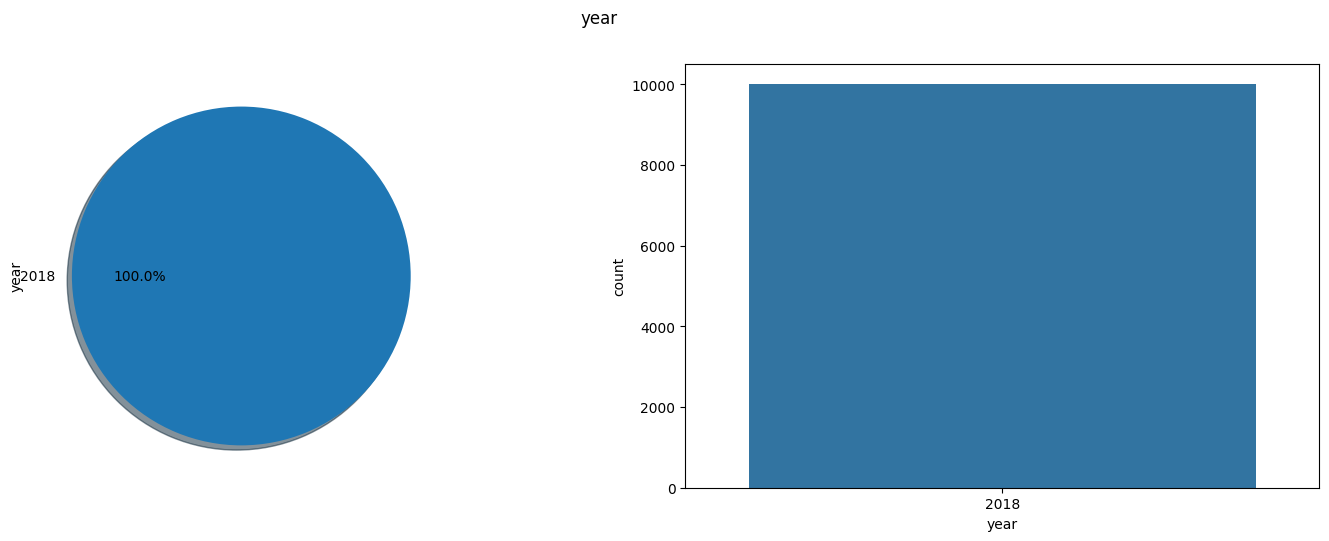

In [293]:
#ターゲット列 Exited をカテゴリ変数リストから除外
categorical_vars.remove('Exited')

for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))

    #各カテゴリの割合を円グラフ（Pie Chart）として表示します

    train_data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    # 棒グラフの作成
    sns.countplot(x=column,data=train_data,ax=ax[1])
    #レイアウトとタイトルの設定
    plt.suptitle(f'{column}')
    #グラフの表示
    plt.show()

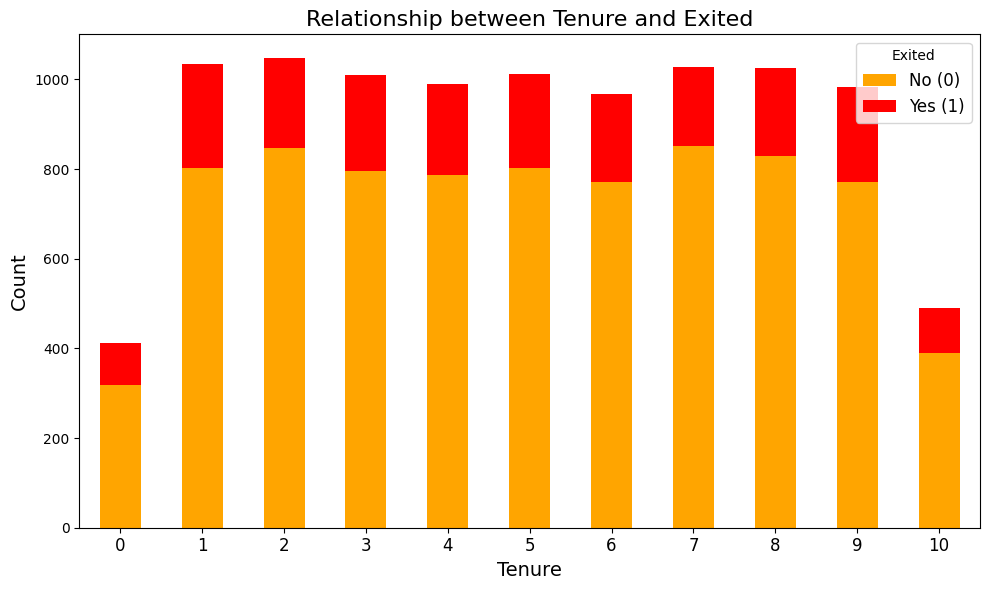

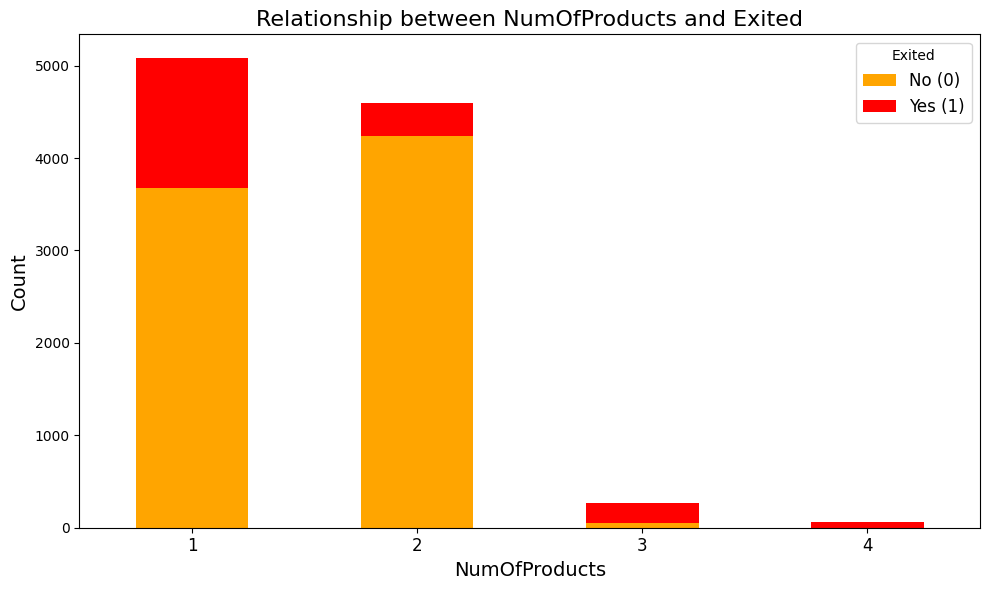

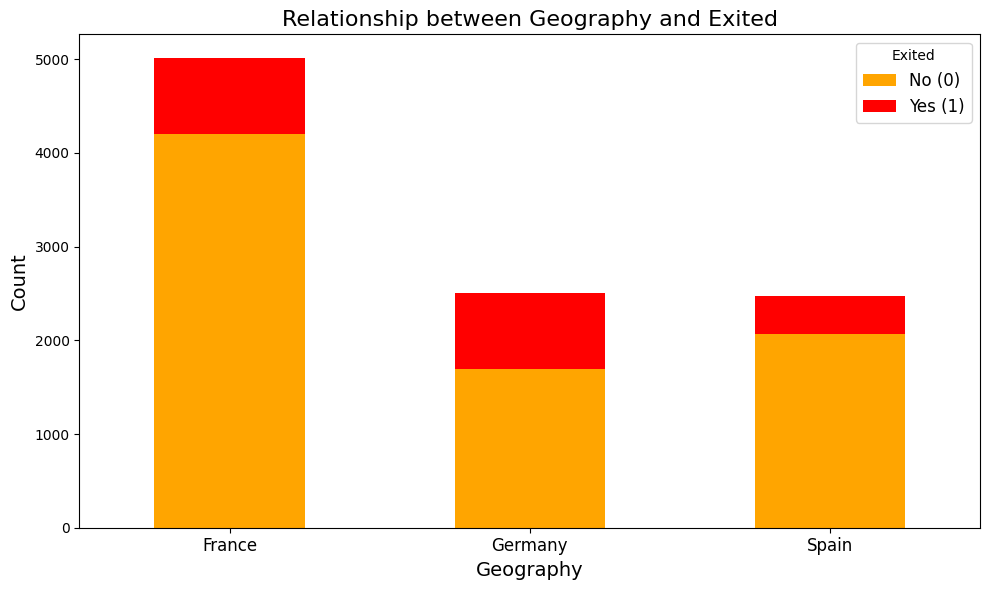

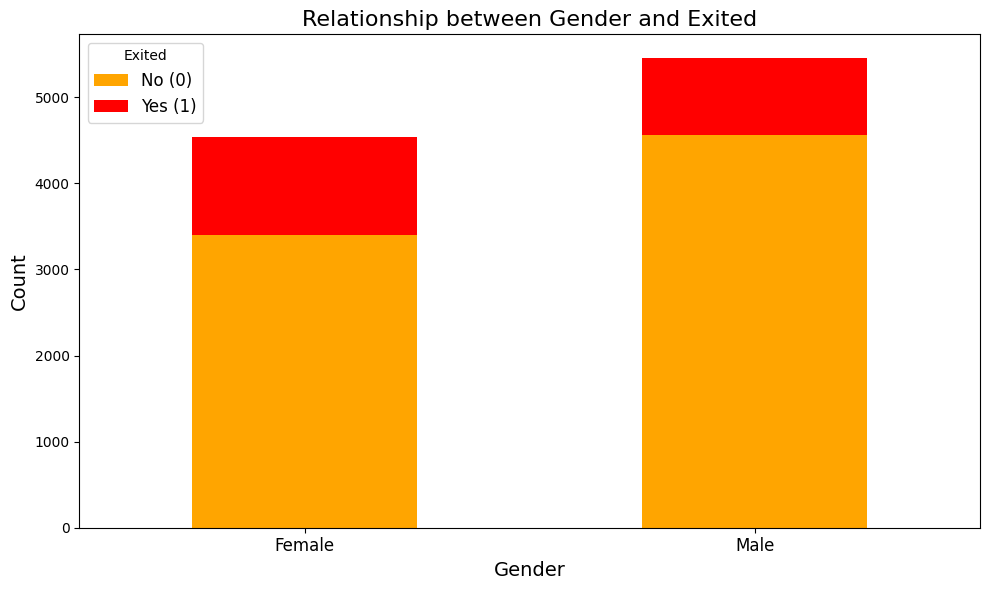

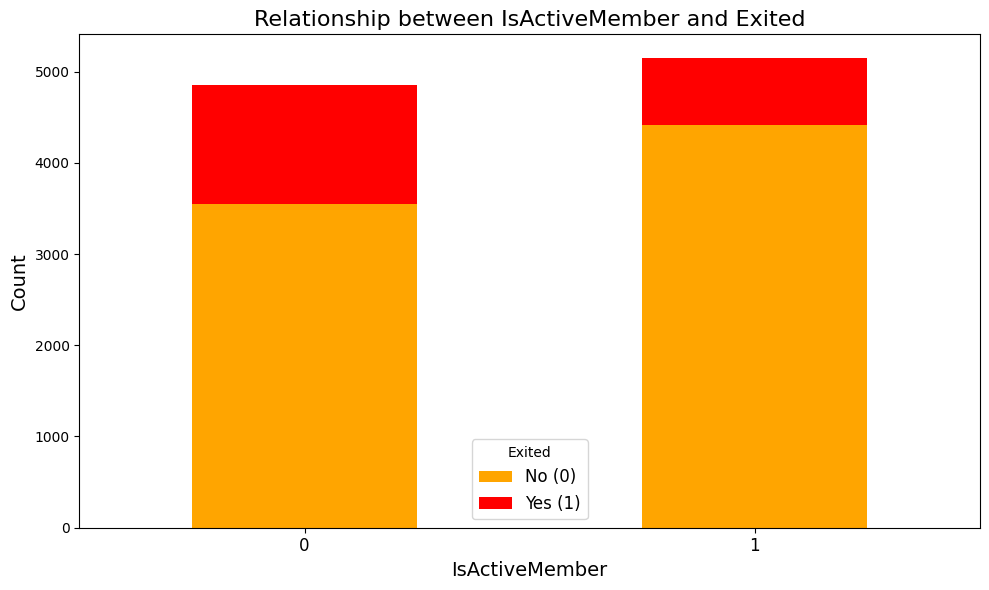

In [258]:
import pandas as pd
import matplotlib.pyplot as plt

# 可視化したいカラムのリスト
columns_to_visualize = ['Tenure', 'NumOfProducts', 'Geography', 'Gender', 'IsActiveMember']

# 各カラムについて棒グラフを描画
for column in columns_to_visualize:
    # データをグループ化して集計
    grouped_data = train_data.groupby([column, 'Exited']).size().unstack()

    # 棒グラフの描画
    grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'red'])
    plt.title(f'Relationship between {column} and Exited', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.legend(title='Exited', labels=['No (0)', 'Yes (1)'], fontsize=12)
    plt.tight_layout()
    plt.show()

# 相関関係を調査

In [259]:
corr_train = train_data.select_dtypes(exclude=object).corr()
corr_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,...,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year,expenditure_1_zero
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.003510,...,9.022388e-03,0.005327,0.008583,0.012171,0.001285,0.014348,-0.008629,0.007464,NaN,0.003510
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.015634,...,1.182385e-03,0.015822,-0.018639,0.003121,-0.011982,-0.014006,-0.001765,0.005350,NaN,-0.015634
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.009562,...,-4.149335e-04,0.007200,-0.006102,-0.007929,0.014864,0.002093,-0.005702,0.010973,NaN,-0.009562
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.002455,...,6.469733e-03,0.026193,-0.003528,-0.011442,-0.014233,0.000795,0.002891,-0.001355,NaN,0.002455
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.009591,...,1.719320e-03,0.001059,-0.001352,0.007539,0.001191,-0.013319,-0.006775,-0.004199,NaN,-0.009591
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.005204,...,4.168333e-03,0.003436,0.009811,-0.008406,-0.008034,-0.025598,-0.001254,-0.013621,NaN,0.005204
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.002513,...,4.201917e-03,0.008511,0.020221,-0.002402,-0.004872,-0.000004,0.001905,-0.001928,NaN,-0.002513
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.009135,...,1.939931e-02,0.000740,-0.003236,0.011206,0.002536,-0.005469,-0.000517,0.002008,NaN,0.009135
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.006870,...,-4.220997e-03,0.002322,-0.004547,0.012046,-0.016412,-0.000774,-0.015998,0.004220,NaN,-0.006870
expenditure_1,-0.003510,0.015634,0.009562,-0.002455,0.009591,-0.005204,0.002513,-0.009135,0.006870,1.000000,...,-6.541970e-03,-0.004524,-0.015832,-0.009609,0.011378,-0.023016,-0.014633,-0.011924,NaN,-1.000000


<Axes: >

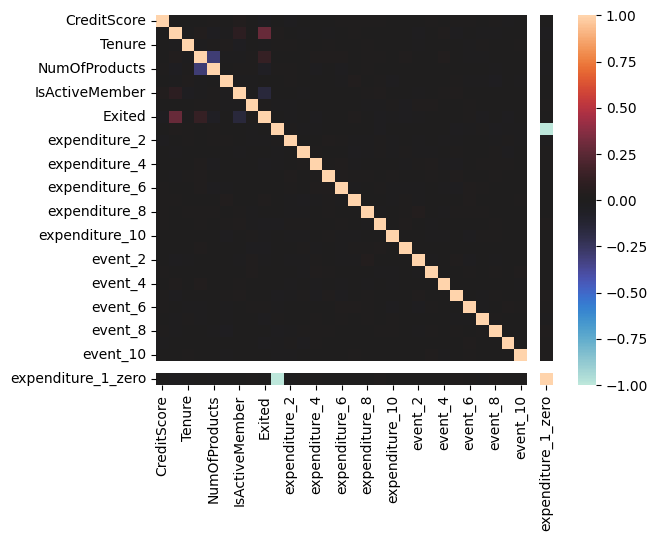

In [260]:
# 相関関係を確認
sns.heatmap(corr_train, vmax=1, vmin=-1, center=0)

# 外れ値の確認

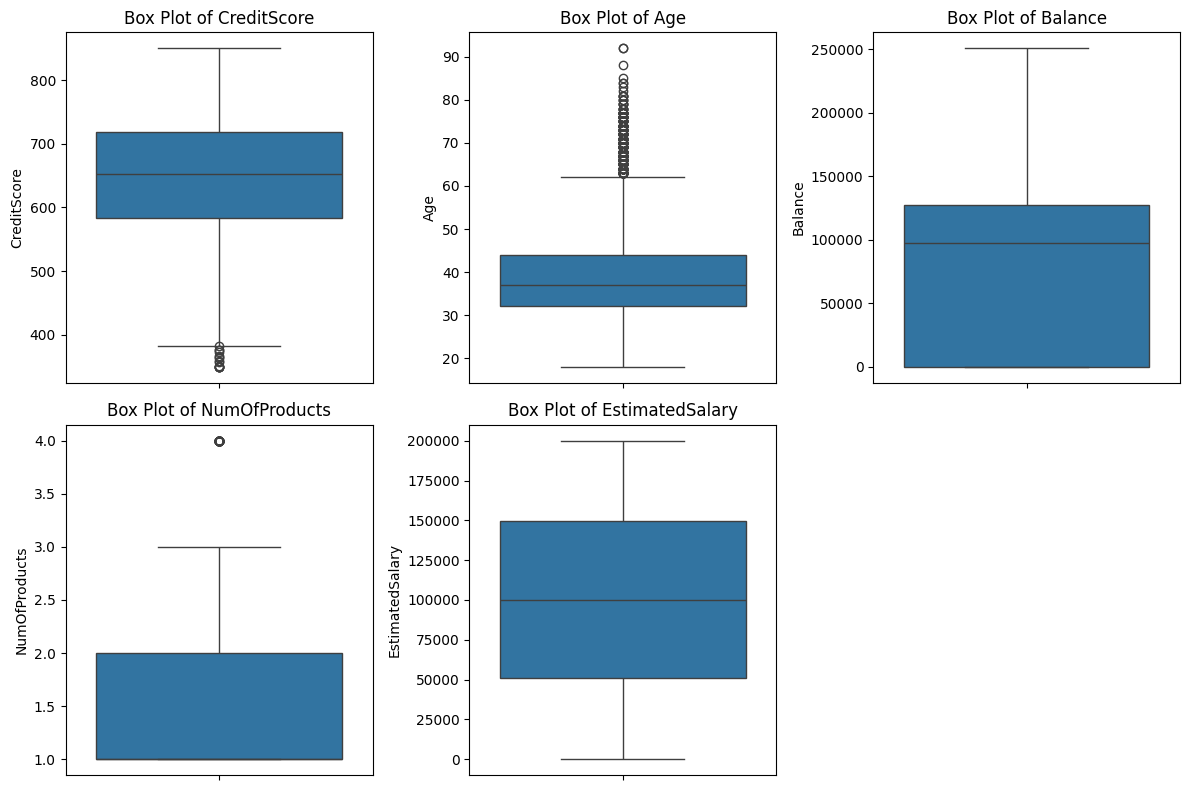

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数値カラム
numeric_columns = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# 数値カラムの外れ値を可視化
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=train_data, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

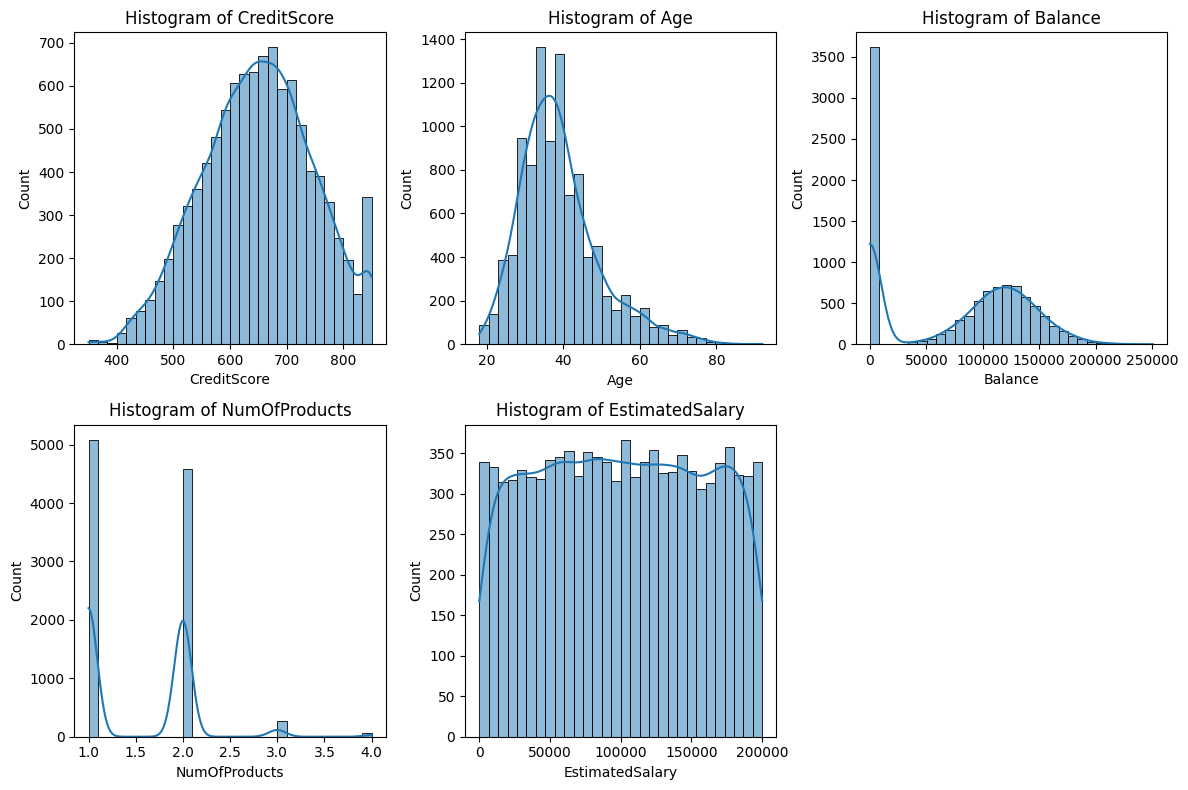

In [262]:
# 数値カラムのヒストグラムを描画
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=train_data, x=column, kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

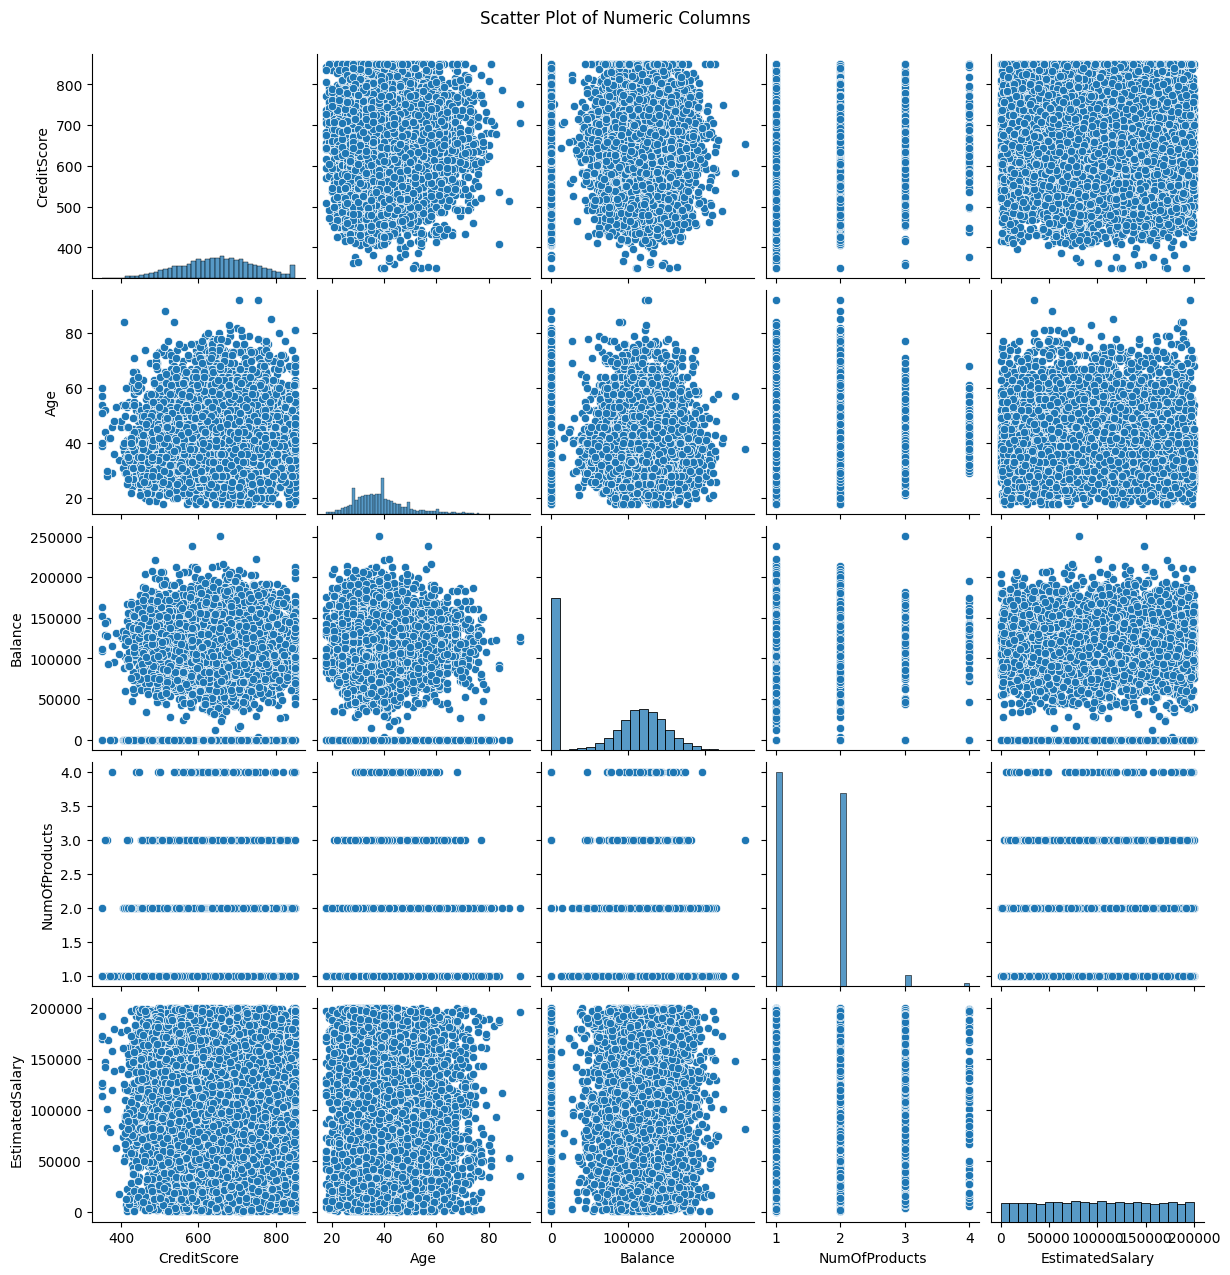

In [263]:
# 数値カラム間の関係性を可視化
sns.pairplot(train_data[numeric_columns])
plt.suptitle('Scatter Plot of Numeric Columns', y=1.02)
plt.show()


### データクリーニング

In [294]:
# 外れ値を検出するカラムを格納するリスト
outlier_columns = []

# 数値カラムに対して外れ値を検出
for column in numeric_columns:
    # 四分位数を計算
    Q1 = train_data[column].quantile(0.25)  # 第1四分位数
    Q3 = train_data[column].quantile(0.75)  # 第3四分位数
    IQR = Q3 - Q1                           # 四分位範囲 (IQR)

    # 下限と上限を計算
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 外れ値の検出（Trueならカラム名を追加）
    if (train_data[column] < lower_bound).any() or (train_data[column] > upper_bound).any():
        outlier_columns.append(column)

# 外れ値があるカラムを表示
print("Columns with outliers:", outlier_columns)

Columns with outliers: ['CreditScore', 'Age', 'NumOfProducts']


In [295]:
#　外れ値があるカラムを指定

outliers = ['CreditScore', 'Age', 'NumOfProducts']

# 修正済みデータを格納する新しいDataFrameを作成
train_data_fixed = train_data.copy()
test_data_fixed = test_data.copy()

for column in outliers:
    Q1 = train_data[column].quantile(0.25)  # 第1四分位数
    Q3 = train_data[column].quantile(0.75)  # 第3四分位数
    IQR = Q3 - Q1                           # 四分位範囲 (IQR)

    # 下限と上限を計算
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 外れ値を下限・上限でクリップ
    train_data_fixed[column] = train_data[column].clip(lower=lower_bound, upper=upper_bound)
    test_data_fixed[column] = test_data[column].clip(lower=lower_bound, upper=upper_bound)

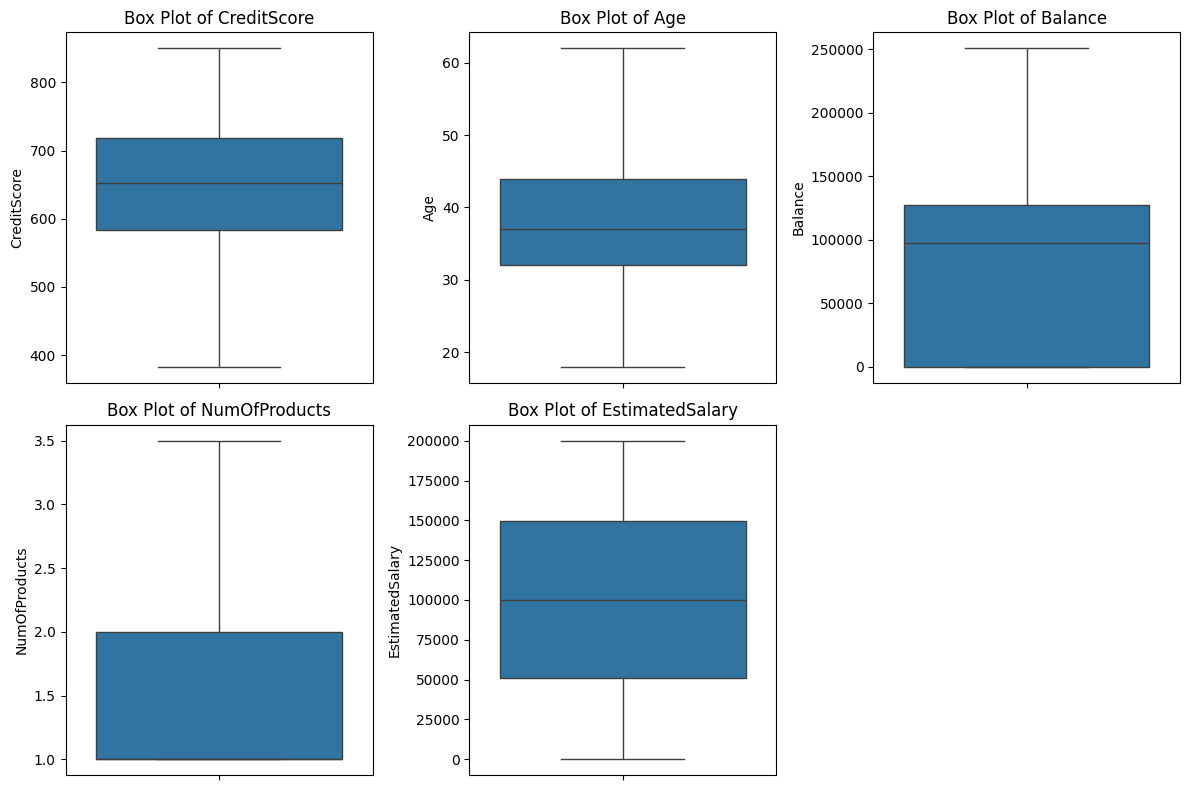

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数値カラム
numeric_columns = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# 数値カラムの外れ値を可視化
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=train_data_fixed, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [297]:
test_data_fixed.shape

(10000, 32)

In [298]:
train_data_fixed.shape

(10000, 32)

# **One-Hotエンコーディング**

In [299]:
# One-Hotエンコーディング関数
# 多重共線性回避のためdrop_first=Trueでフランスを削除
def one_hot_encode(data, categorical_columns):
    """
    Categorical columns will be one-hot encoded.
    :param data: DataFrame
    :param categorical_columns: List of categorical column names
    :return: One-hot encoded DataFrame
    """
    return pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)

# カテゴリ変数を特定
categorical_columns = ['Geography', 'Gender']

# 学習データのエンコーディング
train_data_encoded = one_hot_encode(train_data_fixed, categorical_columns)

# テストデータのエンコーディング
test_data_encoded = one_hot_encode(test_data_fixed, categorical_columns)

# 'year' 列を除外した特徴量データ
train_data_encoded = train_data_encoded.drop(columns=['year'])

# 検証用データも 'year' 列を除外
test_data_encoded = test_data_encoded.drop(columns=['year'])


# 修正後のデータ確認
print("Train Data After Encoding (First 5 Rows):")
print(train_data_encoded.head())

print("\nTest Data After Encoding (First 5 Rows):")
print(test_data_encoded.head())


Train Data After Encoding (First 5 Rows):
   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00            1.0          1   
1          608   41       1   83807.86            1.0          0   
2          502   42       8  159660.80            3.0          1   
3          699   39       1       0.00            2.0          0   
4          850   43       2  125510.82            1.0          1   

   IsActiveMember  EstimatedSalary  Exited  expenditure_1  ...  event_4  \
0               1        101348.88       1           1000  ...        0   
1               1        112542.58       0           1000  ...        1   
2               0        113931.57       1              0  ...        0   
3               0         93826.63       0           1000  ...        0   
4               1         79084.10       0           1000  ...        1   

   event_5  event_6  event_7  event_8  event_9  event_10  Geography_Germany  \
0        0        0

In [289]:
test_data_encoded.shape

(10000, 32)

In [290]:
train_data_encoded.shape

(10000, 33)

In [272]:
train_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,...,event_5,event_6,event_7,event_8,event_9,event_10,expenditure_1_zero,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1.0,1,1,101348.88,1,1000,...,0,0,1,1,0,0,0,0,0,0
1,608,41,1,83807.86,1.0,0,1,112542.58,0,1000,...,1,0,0,0,0,0,0,0,1,0
2,502,42,8,159660.80,3.0,1,0,113931.57,1,0,...,1,0,0,1,0,0,1,0,0,0
3,699,39,1,0.00,2.0,0,0,93826.63,0,1000,...,0,0,0,0,0,0,0,0,0,0
4,850,43,2,125510.82,1.0,1,1,79084.10,0,1000,...,0,0,1,0,0,0,0,0,1,0


In [273]:
test_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,...,event_4,event_5,event_6,event_7,event_8,event_9,event_10,Geography_Germany,Geography_Spain,Gender_Male
0,621,41,2,65.00,1.0,1,1,101347.88,1,956,...,0,0,0,1,1,0,0,0,0,0
1,615,40,1,83762.86,1.0,0,1,112541.58,0,1013,...,1,1,0,0,0,0,0,0,1,0
2,495,41,7,159659.80,3.0,1,0,113931.57,1,-42,...,0,1,0,0,1,0,0,0,0,0
3,704,38,1,92.00,2.0,0,0,93826.63,0,991,...,0,0,0,0,0,0,0,0,0,0
4,859,43,2,125536.82,1.0,1,1,79084.10,1,968,...,1,0,0,1,0,0,0,0,1,0


# ターゲット変数と各特徴量の相関を確認

In [300]:
import pandas as pd
from scipy.stats import pointbiserialr

# Exitedと各数値特徴量の相関を計算
correlations = {}
for column in train_data_encoded.columns:
    corr, _ = pointbiserialr(train_data_encoded[column], train_data_encoded["Exited"])
    correlations[column] = corr

# 結果をソートして表示
correlations = pd.Series(correlations).sort_values(ascending=False)
print(correlations)

Exited               1.000000
Age                  0.312436
Geography_Germany    0.173488
Balance              0.118533
expenditure_7        0.017406
EstimatedSalary      0.012097
event_6              0.012046
expenditure_1        0.006870
expenditure_6        0.005661
event_10             0.004220
event_4              0.002322
expenditure_8        0.001599
event_8             -0.000774
expenditure_5       -0.002260
expenditure_3       -0.004014
event_3             -0.004221
event_5             -0.004547
HasCrCard           -0.007138
expenditure_10      -0.008146
Tenure              -0.014001
event_2             -0.014055
expenditure_2       -0.015125
expenditure_4       -0.015808
event_1             -0.015894
event_9             -0.015998
event_7             -0.016412
expenditure_9       -0.021773
CreditScore         -0.026455
Geography_Spain     -0.052667
NumOfProducts       -0.059196
Gender_Male         -0.106512
IsActiveMember      -0.156128
dtype: float64


In [301]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIFを計算
vif_data = pd.DataFrame()
vif_data["Feature"] = train_data_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(train_data_encoded.values, i) for i in range(train_data_encoded.shape[1])]

# 結果を表示
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature        VIF
0         CreditScore  24.911593
1                 Age  15.685246
4       NumOfProducts   8.272515
19            event_1   4.870654
7     EstimatedSalary   3.911980
2              Tenure   3.897175
5           HasCrCard   3.313809
3             Balance   3.242285
20            event_2   2.485935
31        Gender_Male   2.200547
6      IsActiveMember   2.150952
21            event_3   1.989684
29  Geography_Germany   1.823793
23            event_5   1.814013
9       expenditure_1   1.649674
8              Exited   1.506993
30    Geography_Spain   1.490930
22            event_4   1.450036
10      expenditure_2   1.427549
26            event_8   1.278781
24            event_6   1.248513
11      expenditure_3   1.242839
12      expenditure_4   1.118613
25            event_7   1.108925
13      expenditure_5   1.105418
14      expenditure_6   1.087417
15      expenditure_7   1.081123
27            event_9   1.056213
16      expenditure_8   1.051017
28        

# 特徴量エンジニアリング

In [302]:
#expenditure の合計・平均
# 学習データに新しい特徴量を作成
train_data_encoded['expenditure_total'] = train_data_encoded[[f'expenditure_{i}' for i in range(1, 11)]].sum(axis=1)

# テストデータにも同じ特徴量を作成
test_data_encoded['expenditure_total'] = test_data_encoded[[f'expenditure_{i}' for i in range(1, 11)]].sum(axis=1)



In [303]:
#イベント参加回数
# 学習データに新しい特徴量を作成
train_data_encoded['total_events'] = train_data_encoded[[f'event_{i}' for i in range(1, 11)]].sum(axis=1)
# テストデータにも同じ特徴量を作成
test_data_encoded['total_events'] = test_data_encoded[[f'event_{i}' for i in range(1, 11)]].sum(axis=1)

In [304]:
# CreditScoreの範囲設定
bins = [300, 600, 700, 800, 900]
labels = ['Poor', 'Fair', 'Good', 'Excellent']  # 各範囲のラベルを指定

# 学習データに新しい特徴量を作成
train_data_encoded['CreditScore_Category'] = pd.cut(train_data_encoded['CreditScore'],
                                                    bins=bins, labels=labels, include_lowest=True)

# テストデータにも同じ特徴量を作成
test_data_encoded['CreditScore_Category'] = pd.cut(test_data_encoded['CreditScore'],
                                                   bins=bins, labels=labels, include_lowest=True)

In [305]:
train_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,...,event_7,event_8,event_9,event_10,Geography_Germany,Geography_Spain,Gender_Male,expenditure_total,total_events,CreditScore_Category
0,619,42,2,0.00,1.0,1,1,101348.88,1,1000,...,1,1,0,0,0,0,0,1000,4,Fair
1,608,41,1,83807.86,1.0,0,1,112542.58,0,1000,...,0,0,0,0,0,1,0,1000,2,Fair
2,502,42,8,159660.80,3.0,1,0,113931.57,1,0,...,0,1,0,0,0,0,0,0,2,Poor
3,699,39,1,0.00,2.0,0,0,93826.63,0,1000,...,0,0,0,0,0,0,0,3500,0,Fair
4,850,43,2,125510.82,1.0,1,1,79084.10,0,1000,...,1,0,0,0,0,1,0,8500,4,Excellent


In [306]:
test_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,...,event_7,event_8,event_9,event_10,Geography_Germany,Geography_Spain,Gender_Male,expenditure_total,total_events,CreditScore_Category
0,621,41,2,65.00,1.0,1,1,101347.88,1,956,...,1,1,0,0,0,0,0,875,4,Fair
1,615,40,1,83762.86,1.0,0,1,112541.58,0,1013,...,0,0,0,0,0,1,0,1329,2,Fair
2,495,41,7,159659.80,3.0,1,0,113931.57,1,-42,...,0,1,0,0,0,0,0,-45,2,Poor
3,704,38,1,92.00,2.0,0,0,93826.63,0,991,...,0,0,0,0,0,0,0,3536,0,Good
4,859,43,2,125536.82,1.0,1,1,79084.10,1,968,...,1,0,0,0,0,1,0,8635,4,Excellent


In [307]:
# 新しく作った特徴量のカテゴリ変数を特定
categorical_columns = [	'CreditScore_Category']

# 学習データのエンコーディング
train_data_encoded = one_hot_encode(train_data_encoded, categorical_columns)

# テストデータのエンコーディング
test_data_encoded = one_hot_encode(test_data_encoded, categorical_columns)

In [308]:
train_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,...,event_9,event_10,Geography_Germany,Geography_Spain,Gender_Male,expenditure_total,total_events,CreditScore_Category_Fair,CreditScore_Category_Good,CreditScore_Category_Excellent
0,619,42,2,0.00,1.0,1,1,101348.88,1,1000,...,0,0,0,0,0,1000,4,1,0,0
1,608,41,1,83807.86,1.0,0,1,112542.58,0,1000,...,0,0,0,1,0,1000,2,1,0,0
2,502,42,8,159660.80,3.0,1,0,113931.57,1,0,...,0,0,0,0,0,0,2,0,0,0
3,699,39,1,0.00,2.0,0,0,93826.63,0,1000,...,0,0,0,0,0,3500,0,1,0,0
4,850,43,2,125510.82,1.0,1,1,79084.10,0,1000,...,0,0,0,1,0,8500,4,0,0,1


In [309]:
test_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,...,event_9,event_10,Geography_Germany,Geography_Spain,Gender_Male,expenditure_total,total_events,CreditScore_Category_Fair,CreditScore_Category_Good,CreditScore_Category_Excellent
0,621,41,2,65.00,1.0,1,1,101347.88,1,956,...,0,0,0,0,0,875,4,1,0,0
1,615,40,1,83762.86,1.0,0,1,112541.58,0,1013,...,0,0,0,1,0,1329,2,1,0,0
2,495,41,7,159659.80,3.0,1,0,113931.57,1,-42,...,0,0,0,0,0,-45,2,0,0,0
3,704,38,1,92.00,2.0,0,0,93826.63,0,991,...,0,0,0,0,0,3536,0,0,1,0
4,859,43,2,125536.82,1.0,1,1,79084.10,1,968,...,0,0,0,1,0,8635,4,0,0,1


In [310]:
# 不要な特徴量を定義
#total_eventsを入れる代わりにevent_*は全て削除、expenditure_totalを入れる代わりにexpenditure_*は削除
#CreditScore_Categoryの代わりにCreditScoreを削除
#expenditure_totalがあるのでNumOfProductsも削除

columns_to_drop = [
    'event_1', 'event_2', 'event_3', 'event_4', 'event_5',
    'event_6', 'event_7', 'event_8', 'event_9', 'event_10',
    'expenditure_1', 'expenditure_2', 'expenditure_3', 'expenditure_4',
    'expenditure_5', 'expenditure_6', 'expenditure_7', 'expenditure_8',
    'expenditure_9', 'expenditure_10', 'CreditScore', 'NumOfProducts'
]

# 不要な特徴量を除外
train_data_encoded = train_data_encoded.drop(columns=columns_to_drop)
test_data_encoded = test_data_encoded.drop(columns=columns_to_drop)


In [311]:
train_data_columns_list = train_data_encoded.columns.tolist()
test_data_columns_list = test_data_encoded.columns.tolist()

# カラム名をリストで表示
print(train_data_columns_list)
print(test_data_columns_list)

['Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'expenditure_total', 'total_events', 'CreditScore_Category_Fair', 'CreditScore_Category_Good', 'CreditScore_Category_Excellent']
['Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'expenditure_total', 'total_events', 'CreditScore_Category_Fair', 'CreditScore_Category_Good', 'CreditScore_Category_Excellent']


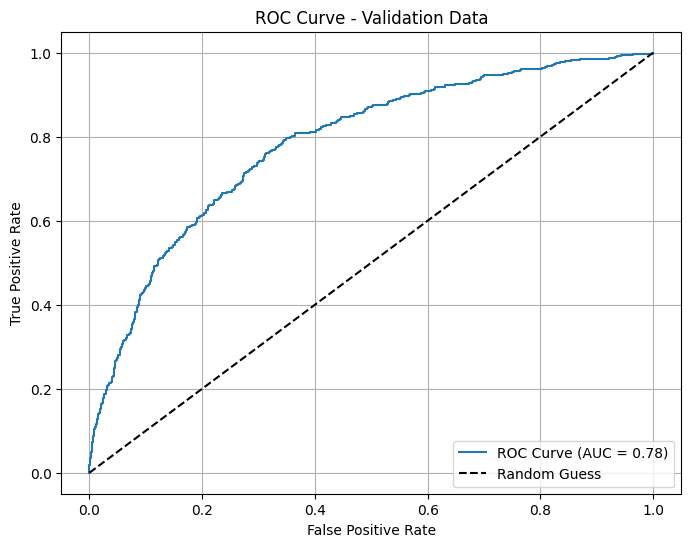

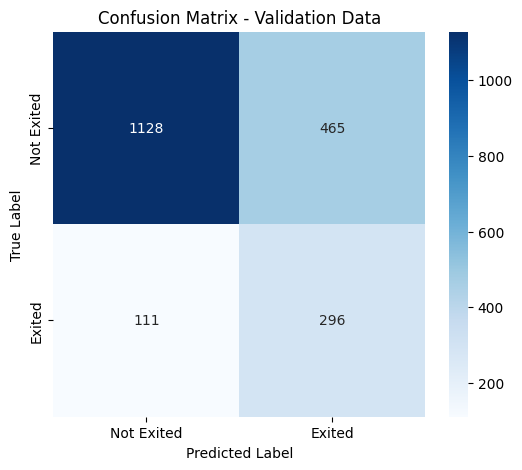

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'solver': 'liblinear'}

Validation Data Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.73      0.51       407

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000

Validation Data ROC AUC: 0.7844701404023438


In [312]:
# ライブラリのインポート
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# 特徴量とターゲットの分離
X = train_data_encoded.drop(columns=['Exited'])
y = train_data_encoded['Exited']

# データの分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# データのスケーリング
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data_encoded.drop(columns=['Exited']))

# ロジスティック回帰のハイパーパラメータ調整
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # 正則化パラメータ
    'solver': ['liblinear', 'lbfgs', 'saga'],  # 最適化手法
    'class_weight': ['balanced', None]
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 最適なモデル
best_log_reg = grid_search.best_estimator_


# 検証データでの評価
y_val_pred_log = best_log_reg.predict(X_val_scaled)
y_val_proba_log = best_log_reg.predict_proba(X_val_scaled)[:, 1]

classification_rep_log_val = classification_report(y_val, y_val_pred_log)
roc_auc_log_val = roc_auc_score(y_val, y_val_proba_log)



def plot_roc_curve(y_true, y_proba, dataset_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_true, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


def plot_confusion_matrix(y_true, y_pred, dataset_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.show()

# 検証データのROC曲線と混同行列
plot_roc_curve(y_val, y_val_proba_log, "Validation Data")
plot_confusion_matrix(y_val, y_val_pred_log, "Validation Data")


# 結果の出力
print("Best Parameters:", grid_search.best_params_)
print("\nValidation Data Classification Report:\n", classification_rep_log_val)
print("Validation Data ROC AUC:", roc_auc_log_val)

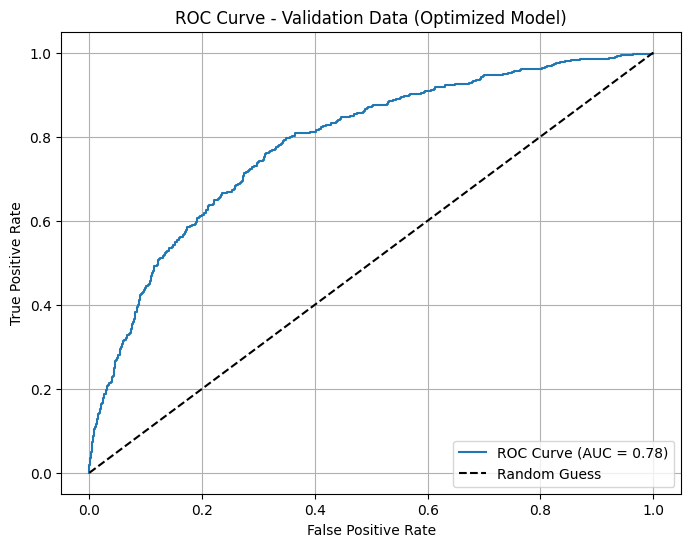

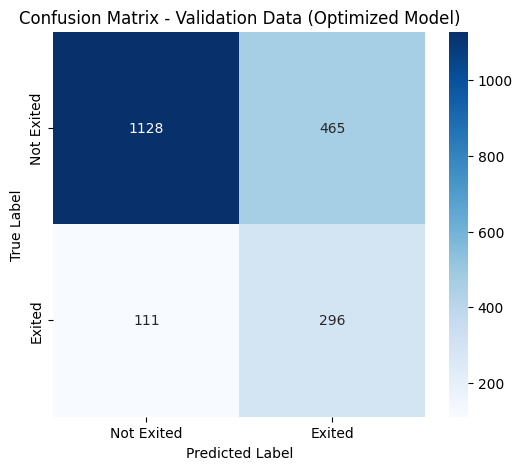

Validation Data Classification Report (Optimized Model):
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.73      0.51       407

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000

Validation Data ROC AUC (Optimized Model): 0.7844701404023438


In [313]:
# 最適なハイパーパラメータを用いたモデルの再定義
optimized_log_reg = LogisticRegression(
    C=0.01, #正則化の強度
    class_weight='balanced', #クラスの不均衡を補正
    solver='liblinear', #数値最適化アルゴリズムを指定
    max_iter=1000,
    random_state=42
)

# モデルの学習
optimized_log_reg.fit(X_train_scaled, y_train)

# 検証データでの予測
y_val_pred_optimized = optimized_log_reg.predict(X_val_scaled)
y_val_proba_optimized = optimized_log_reg.predict_proba(X_val_scaled)[:, 1]

# 検証データでの評価
classification_rep_optimized_val = classification_report(y_val, y_val_pred_optimized)
roc_auc_optimized_val = roc_auc_score(y_val, y_val_proba_optimized)

# 検証データのROC曲線と混同行列を再プロット
plot_roc_curve(y_val, y_val_proba_optimized, "Validation Data (Optimized Model)")
plot_confusion_matrix(y_val, y_val_pred_optimized, "Validation Data (Optimized Model)")

# 結果の出力
print("Validation Data Classification Report (Optimized Model):\n", classification_rep_optimized_val)
print("Validation Data ROC AUC (Optimized Model):", roc_auc_optimized_val)



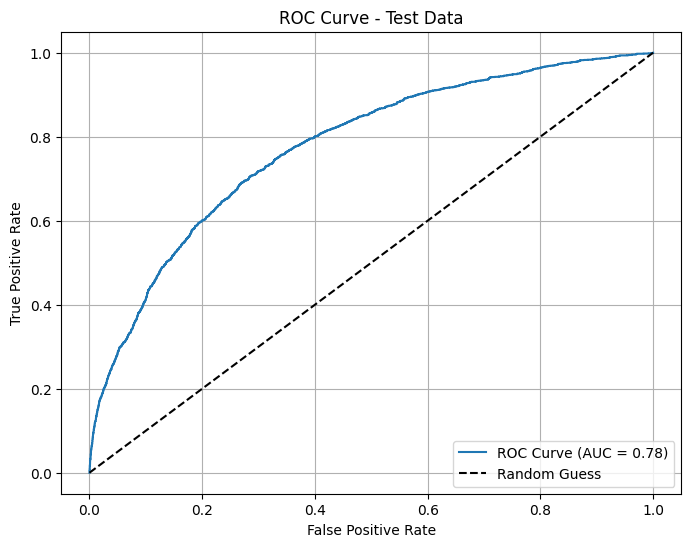

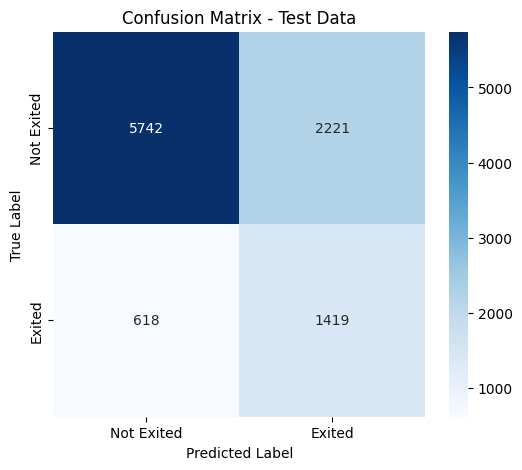


Test Data Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      7963
           1       0.39      0.70      0.50      2037

    accuracy                           0.72     10000
   macro avg       0.65      0.71      0.65     10000
weighted avg       0.80      0.72      0.74     10000

Test Data ROC AUC: 0.7757535449761479


In [314]:
# テストデータでの評価
y_test = train_data_encoded['Exited']
y_test_pred_log = optimized_log_reg.predict(X_test_scaled)
y_test_proba_log = optimized_log_reg.predict_proba(X_test_scaled)[:, 1]

classification_rep_log_test = classification_report(y_test, y_test_pred_log)
roc_auc_log_test = roc_auc_score(y_test, y_test_proba_log)


# テストデータのROC曲線と混同行列
plot_roc_curve(y_test, y_test_proba_log, "Test Data")
plot_confusion_matrix(y_test, y_test_pred_log, "Test Data")


print("\nTest Data Classification Report:\n", classification_rep_log_test)
print("Test Data ROC AUC:", roc_auc_log_test)